# 중고자동차 가격 예측
---

## 데이터 소개
    - kaggle에서 제공하는 Used Car Dataset
    - 스크래핑으로 수집된 데이터
    
    - vehicles.csv
    id : 중고차 거래의 아이디
    url : 중고차 거래 페이지
    region : 해당 거래의 관리 지점
    region_url : 거래 관리 지점의 홈페이지
    price : 기입된 자동차의 거래가
    year : 중고차의 생산연도
    manufacturer : 자동차를 생산한 회사
    model : 자동차 모델명
    condition : 자동차의 상태
    cylinders : 자동차의 기통 수
    fuel : 자동차의 연료 타입
    odometer : 자동차의 운행 마일 수
    title_status : 자동차의 타이틀 상태 (소유주 등록 상태)
    transmission : 자동차의 트랜스미션 종류
    vin : 자동차의 식별 번호 (vehicle identification number)
    drive : 자동차의 구동 타입
    size : 자동차 크기
    type : 자동차의 일반 타입 (세단, ...)
    paint_color : 자동차 색상
    image_url : 자동차 이미지
    description : 세부 설명
    county : 실수로 생성된 미사용 컬럼
    state : 거래가 업로드된 미 주
    lat : 거래가 업로드된 곳의 위도
    long : 거래가 업로드된 곳의 경도
 
    
- 데이터 출처: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

## 데이터 스크래핑

- 일반적으로 웹에서 스크랩을 한다고 할 경우 html내에서 데이터의 형식을 예측해서, 해당 형식의 데이터를 가져오도록 지정 (by selenium)<br><br>
- 다만 이 경우 해당 페이지의 위치가 리뉴얼 되거나 하는 등의 변동이 있을때 위에 말한 '예측' 대로 데이터가 수집되지 않을 가능성이 높다.<br><br>
- 즉, 이상치(outlier) 데이터가 다량 발생할 가능성이 많다.<br>
    - 빈 데이터를 스크랩한 경우<br>
    - 형식이 틀린 경우 <br>
        - 문자열 : 앞뒤에 공백, html태그 포함하여 스크랩, 인코딩에 의해 깨진 문자<br>
        - 숫자 : 최대값 & 최소값으로 잘못 기입 되는 경우, 숫자 대신 문자열로 스크랩된 경우<br>

# 데이터셋 불러오기

In [102]:
# 기초 전처리
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import os

# 기본 캔버스 사이즈 적용
plt.rcParams['figure.figsize'] = (12, 9)

# 컬럼 전체 확인 가능하도록 출력 범위 설정
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

# pandas 결과값의 표현 범위 소수점 2자리수로 변경
pd.options.display.float_format = '{:.2f}'.format

# 파일 로드위한 directory 확인 및 현재 경로로 설정
a = os.getcwd()
os.chdir(a)

In [103]:
df = pd.read_csv('vehicles.csv')

# EDA 및 데이터 기초 통계 분석

In [104]:
# 전체 데이터 탐색
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.00,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.00,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.00,hyundai,sonata,excellent,4 cylinders,gas,93600.00,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.55,-85.47,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.00,bmw,x3 3.0i,good,6 cylinders,gas,87046.00,clean,automatic,NaN,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.62,-85.46,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.00,chevrolet,c-10,good,4 cylinders,gas,190000.00,clean,automatic,NaN,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.86,-85.22,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.00,ford,f350 lariat,excellent,8 cylinders,diesel,116000.00,lien,automatic,NaN,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.55,-85.47,2020-12-01T12:53:56-0600


In [105]:
print(df['year'].unique())
max(df['year'].unique())

[2010. 2014. 2006. 1974. 2005. 2016. 2012. 2017. 2019. 2013. 2003.   nan
 1996. 2020. 2018. 2009. 2015. 1986. 2004. 2011. 2007. 2008. 1990. 1999.
 1961. 1997. 2000. 1976. 1992. 1968. 2002. 1979. 1991. 1956. 2001. 1998.
 1988. 1993. 1955. 1971. 1978. 1957. 1964. 1994. 1966. 1982. 1962. 1941.
 1930. 1995. 1946. 1981. 1967. 1963. 1950. 1937. 1954. 1969. 1911. 1973.
 1983. 1989. 1984. 1929. 1972. 1987. 1977. 1965. 1985. 1936. 1953. 1980.
 1912. 1926. 1940. 2021. 1970. 1975. 1960. 1924. 1931. 1951. 1928. 1948.
 1949. 1934. 1952. 1919. 1947. 1933. 1939. 1958. 1959. 1938. 1932. 1923.
 1935. 1927. 1945. 1900. 1922. 1942. 1925. 1913. 1918. 1920. 1914. 1915.
 1943. 1910. 1921.]


2021.0

In [106]:
df[['year','price']].corr()

,year,price
year,1.00,-0.00
price,-0.00,1.00


In [107]:
df['condition'].unique()

array(['good', 'excellent', nan, 'like new', 'fair', 'salvage', 'new'],
      dtype=object)

In [108]:
df['cylinders'].unique()

array(['8 cylinders', '4 cylinders', '6 cylinders', nan, '10 cylinders',
       'other', '5 cylinders', '3 cylinders', '12 cylinders'],
      dtype=object)

In [109]:
df['fuel'].unique()

array(['gas', 'diesel', 'other', 'hybrid', nan, 'electric'], dtype=object)

In [110]:
df['size'].unique()

array([nan, 'full-size', 'mid-size', 'compact', 'sub-compact'],
      dtype=object)

In [111]:
df['type'].unique()

array(['other', 'sedan', 'SUV', 'pickup', 'coupe', 'van', nan, 'truck',
       'mini-van', 'wagon', 'convertible', 'hatchback', 'bus', 'offroad'],
      dtype=object)

- Unnamed:0 (df의 index #), id 컬럼은 분석에 불필요한 컬럼이므로 drop 필요
- year(중고차 생산연도) : 가장 최신이 2021이므로 단순하게 회귀를 돌리면 2021에 가까울 수록 가격이 높게 예측될 수 있다.
    - 추가로 전체 데이터 중 시작연도가 불분명하기 때문에 그대로 사용하기 어려움
    - 해당 데이터를 사용하기 위해서는 전처리를 통해 조정 해줄 필요가 있음
- manufacturer : 생산사 데이터
    - 해당 데이터 기준으로 종류별, 생산년도별 등 기준에 따른 가격을 통해 브랜드 선호도 등을 파악할 수 있을 듯
    - 즉, 가격 결정에 중요한 요인이 될 수 있는 변수로 예상 됨
- odometer : 몇몇 데이터는 정수로 떨어지는것에 비해 디테일한 값도 있다.
    - 정확하지 않게 대략적으로 기입된 데이터들이 있을 수 있음.
    - 해당 데이터의 처리법을 고민 해볼 필요 있음
    - binning을 통해 구간으로 나눠 categorical로 나누는 것도 방법일듯.(시각화 하여 확인 필요)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

In [113]:
df.isna().sum()

Unnamed: 0           0
id                   0
url                  0
region               0
region_url           0
price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
title_status      2577
transmission      2442
VIN             187549
drive           134188
size            321348
type            112738
paint_color     140843
image_url           28
description         70
state                0
lat               7448
long              7448
posting_date        28
dtype: int64

- 약 45만개 데이터
- 중요하리라 예상한 manufacturer이 누락치가 18000여개
    - 45만개 대비로 보면 큰 수치는 아니지만, 중요 변수로 예상되기 때문에 필요시 drop할 필요 있어 보임.
- condition : 45만개중 약 20만개로 상당히 큰 비중의 누락치 
    - 중요하지 않다면 condition자체를 drop하면 되지만, 상식적으로 생각해도 꽤 유의미한 데이터 일 것으로 예상
    - 다른 컬럼을 기반으로 참조해서 전처리를 통해 채워넣어야 할 필요성이 있어 보임
- cylinders 도 condition과 마찬가지
- paintcolor의 경우 도 꽤 중요할 것으로 보이는데 누락된 값이 너무 많음
    - 실제 image 링크가 있는 것으로 보아 사진으로 판별이 가능하여 대부분 누락된 것으로 예상됨
    - 가격 예측에 활용은 하고 싶지만 현실적으로 사용하기가 쉽지 않아 보임

In [114]:
df.describe()

,Unnamed: 0,id,price,year,odometer,lat,long
count,458213.00,458213.00,458213.00,457163.00,402910.00,450765.00,450765.00
mean,229106.00,7235233427.48,40420.93,2010.75,101669.76,38.53,-94.38
std,132274.84,4594362.05,8194598.60,8.87,3228622.54,5.86,18.08
min,0.00,7208549803.00,0.00,1900.00,0.00,-82.61,-164.09
25%,114553.00,7231952523.00,4900.00,2008.00,40877.00,34.60,-110.89
50%,229106.00,7236408504.00,10995.00,2013.00,87641.00,39.24,-88.31
75%,343659.00,7239320847.00,21495.00,2016.00,134000.00,42.48,-81.02
max,458212.00,7241019367.00,3615215112.00,2021.00,2043755555.00,82.05,150.90


- price (null이 없음)
    - 중고거래 평균가(mean) : 약 4만 달러
    - 하위 25% : 약 5천 달러
    - 중앙값(50%) : 약 1만불
    - 상위 25% : 약 2만불
    - 최대값 : 36억 달러 
    - 최소값 : 0원 (null은 없지만 0인 데이터가 많을 수도 있음)
    - 평균가에 비해 상위 값 평균치가 너무 낮고, 최소값이 0인 것으로 보아 데이터 입력에 오류가 있을 가능성이 보임

- year
    - 평균 거래 성사년도 : 2010
    - 가장 오래된 거래년도(min) 이 1900 으로 평균치와 100년이 차이가 난다.
    - year 데이터의 연도별 빈도를 봐야 알겠지만 min값은 상당히 값이 튀는 경향이 있어 보인다.
    
- odometer(운행 마일수)
    - 평균값 : 약 10만 마일
    - 최소값 : 0마일 (중고차인데 0마일인 것은 이상치일 가능성이 크다.)
    - 최대값 : 약 20억 마일 (약 32억 km) 
    - price와 마찬가지로 값이 잘못입력된 데이터들이 많을 것으로 예상 된다.

## 기초 데이터 전처리

- 불필요한 컬럼 제거
- year를 2021년 기준으로 계산하여 age(차량의 연식) 으로 치환

In [115]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'image_url', 'description', 'state', 'lat', 'long', 'posting_date'], dtype='object')

In [116]:
# 불필요한 or 사용하지 않을 컬럼 제거
df.drop(['Unnamed: 0', 'id', 'url', 'region_url', 'VIN',
         'image_url', 'description', 'state', 'lat', 
         'long', 'posting_date'], axis=1, inplace=True)

In [117]:
df['age'] = 2021 - df['year']
df.drop('year', axis=1, inplace=True)

In [118]:
df

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,age
0,auburn,35990,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.00,clean,other,rwd,NaN,other,NaN,11.00
1,auburn,7500,hyundai,sonata,excellent,4 cylinders,gas,93600.00,clean,automatic,fwd,NaN,sedan,NaN,7.00
2,auburn,4900,bmw,x3 3.0i,good,6 cylinders,gas,87046.00,clean,automatic,NaN,NaN,SUV,blue,15.00
3,auburn,2000,chevrolet,c-10,good,4 cylinders,gas,190000.00,clean,automatic,rwd,full-size,pickup,blue,47.00
4,auburn,19500,ford,f350 lariat,excellent,8 cylinders,diesel,116000.00,lien,automatic,4wd,full-size,pickup,blue,16.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,wausau,14995,cadillac,srx,excellent,6 cylinders,gas,83790.00,clean,automatic,4wd,mid-size,SUV,silver,7.00
458209,wausau,17895,hyundai,tucson,excellent,4 cylinders,gas,31888.00,clean,automatic,4wd,mid-size,SUV,white,3.00
458210,wyoming,17900,cadillac,cts coupe awd,excellent,6 cylinders,gas,53000.00,clean,automatic,4wd,mid-size,coupe,black,7.00
458211,wyoming,1300,jeep,grand cherokee,good,8 cylinders,gas,164000.00,clean,automatic,4wd,mid-size,SUV,white,13.00


## 범주형 데이터 분석

### 1) manufacturer

In [119]:
# 제조사의 총 개수 파악
len(df['manufacturer'].value_counts())

43

In [120]:
# 제조사별 중고차 데이터의 개수 확인
df['manufacturer'].value_counts()

ford               79666
chevrolet          64977
toyota             38577
honda              25868
nissan             23654
jeep               21165
ram                17697
gmc                17267
dodge              16730
bmw                12352
hyundai            10975
mercedes-benz      10628
subaru             10510
volkswagen         10489
kia                 8854
chrysler            7499
lexus               7119
cadillac            6743
buick               6009
mazda               5931
audi                5583
acura               4008
infiniti            3714
lincoln             3338
pontiac             3037
volvo               2866
mini                2330
mitsubishi          2301
porsche             1779
rover               1662
mercury             1645
saturn              1393
tesla               1067
jaguar              1060
fiat                 955
alfa-romeo           187
harley-davidson      139
ferrari               96
datsun                63
aston-martin          35


In [121]:
# 범주형 변수 시각화 전용 함수 생성
# figsize 기본은 (8,10) 으로하되, 임의로 변경 가능하도록 지정
# data=df.fillna('n/a') 를 통해 누락된 값을 n/a 라는 새로운 category를 만들어 줌.
# order 를 통해 count 값이 큰 것 기준으로 정렬되어 출력되도록 설정
# category 명이 길어서 x축으로 할 경우 글자가 겹치므로 y축에 데이터 입력


def countplot(column, figsize=(8,10)):
    fig = plt.figure(figsize=figsize)
    sns.countplot(y=column, data=df.fillna('n/a'), order=df.fillna('n/a')[column].value_counts().index);

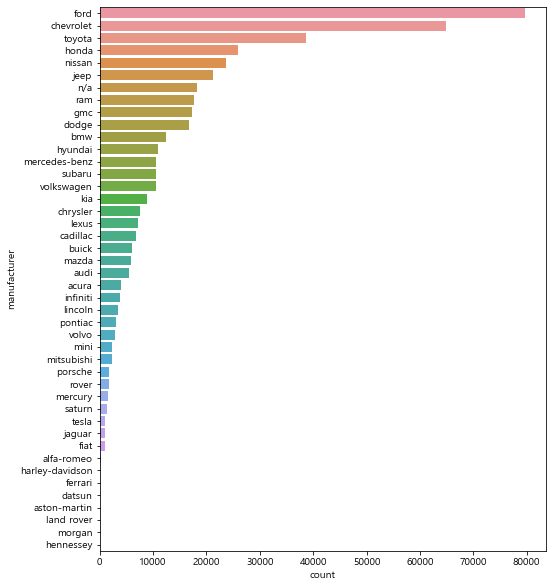

In [122]:
# manufacturer 시각화
countplot('manufacturer')

In [123]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'age'], dtype='object')

### 2) model

In [124]:
len(df['model'].value_counts())

31520

In [125]:
# length가 너무 긴 데이터의 경우 value_counts()를 해도 전체 데이터를 출력해주지 않는다.
df['model'].value_counts()

f-150                       8370
silverado 1500              5964
1500                        4211
camry                       4033
accord                      3730
                            ... 
dart sxt 4dr sedan             1
century custom 4dr sedan       1
sienna le 8 passenger          1
soul base 4dr crossover        1
caravana                       1
Name: model, Length: 31520, dtype: int64

In [126]:
# for문을 활용해 전체 내용을 출력할 수 는 있다.
# 모델명 : df['model'].value_counts().index
# 모델 별 숫자 : df['model'].value_counts()

for model, num in zip(df['model'].value_counts().index, df['model'].value_counts()):
  print(model, num)

f-150 8370
silverado 1500 5964
1500 4211
camry 4033
accord 3730
altima 3490
civic 3479
escape 3444
silverado 3090
explorer 2941
equinox 2923
corolla 2801
wrangler 2788
mustang 2652
malibu 2649
tacoma 2649
fusion 2608
grand cherokee 2574
focus 2491
grand caravan 2445
2500 2438
tahoe 2266
cr-v 2230
impala 2127
cruze 2125
sonata 2062
elantra 2010
sentra 1914
jetta 1870
prius 1863
rav4 1832
odyssey 1831
outback 1791
silverado 2500hd 1780
edge 1735
charger 1718
sierra 1500 1696
rogue 1687
forester 1514
traverse 1489
camaro 1472
pilot 1441
wrangler unlimited 1412
3500 1396
suburban 1381
f-250 1357
corvette 1345
sienna 1328
highlander 1318
f150 1311
acadia 1308
tundra 1302
soul 1294
sierra 1272
cherokee 1220
f-350 1164
journey 1117
passat 1098
town & country 1091
taurus 1091
4runner 1080
optima 1073
expedition 1073
challenger 1005
impreza 1004
murano 997
300 992
fusion se 966
colorado 960
enclave 957
c-class 952
escalade 930
pathfinder 914
durango 910
sorento 908
200 907
ranger 902
liberty 86

matrix xr 49
aspen 49
crv ex awd 49
FREIGHTLINER COLUMBIA 49
cherokee sport suv 4d 49
versa note sv 49
silverado z71 49
wrangler unlimited x 49
HUMMER H3 49
is 300 49
beetle tdi 49
corolla le 4dr sedan 49
f-pace 49
tiburon 49
international 49
s-type 49
prius plug-in hybrid 48
celica 48
sierra 3500hd denali 48
c70 48
r8 48
gti hatchback sedan 48
f350 lariat 48
firebird formula ws6 cou 48
tundra double cab 48
ranger supercab xlt pickup 48
m35 48
econoline commercial cutaway 48
rav4 awd 48
Maserati Ghibli 48
3500 mega cab 48
f-350sd lariat 48
towncar 48
ranger super cab 48
venture 48
ats sedan 48
transit connect xl 48
canyon crew cab pickup 4d 5 48
savana 2500 48
e-150 48
intern 48
es330 48
1500 classic regular cab 48
scion xd 47
pt cruiser limited 47
maxima s 47
beetle convertible 47
mazda3 i touring 47
sequoia limited 47
tahoe ltz sport 47
f-550sd 47
soul base 47
armada platinum 47
wrangler rubicon sport 47
expedition el xlt sport 47
cts-v 47
rogue s awd 47
element ex 47
tracker 47
Hino

f150 platinum 4x4 20
gladiator rubicon pickup 4d 20
titan xd crew cab sl 4x4 20
530xi 20
tundra prerunner sr5 double cab iforce 4.6 ltr v8 20
silverado 2500 ltz z71 crew cab 4x4 duramax diesel 20
2500 slt lifted 4x4 5.7 liter hemi 20
cadenza 20
tahoe ltz pwr 3rd row seat 4x4 5.3 ltr v8 20
seville sls 20
oldsmobile bravada 20
hr-v ex 20
relay 20
xjs 20
aspen limited 20
f150 king ranch 4x4 20
mustang boss 302 coupe 2d 20
1500 silverado 20
express g1500 20
cherokee latitude 4x4 20
santa fe awd 20
fiesta st 20
Pilot 20
a4 2.0t 20
crosstrek premium 20
1500 regular cab 20
flex limited sport utility 20
altima 2.5 s sedan 20
z3 convertible 20
Peterbilt PETE 579 20
cr-v ex-l sport utility 4d 20
650i convertible 20
eldorado coupe 20
cobalt lt coupe 2d 20
qx70 3.7 sport utility 20
k1500 20
suburban ltz 4x4 20
f-350 lariat crew cab srw 4x4 powerstroke diesel 20
civic sport 20
inter 20
outlander se 20
escape xlt awd 20
g25 sedan 20
golf tsi wolfsburg 20
colorado z71 4x4 gas 20
freightliner columbia

tercel 11
3i 11
f-150 fx4 4wd truck leathe 11
stratus r/t 11
cmax 11
international 2574 11
m3 coupe 11
tundra trd pro 11
town&country 11
cayman s 28,000 miles 11
c300 4matic awd 11
440i 11
c250 11
fairlane 500 11
200 c 11
comanche 11
Hino Refrigerated Box Truck, 183 11
verano convenience group 11
journey gt awd leather 11
tiguan limited 11
xt6 11
ranger lariat 11
F150 11
verano leather group 11
mack pinnacle 11
n Rogue 11
f150 limited 4x4 half ton 11
accent ghls 11
Suzuki XL7 11
grand cherokee srt 11
tacoma limited 11
power wagon 11
dakota crew cab 11
element awd 11
rav4 hybrid xse 11
uplander lt 11
f-150 88,000 miles 1 11
sentra sv fwd gas sedan 11
cherokee 4wd 4dr trailhawk 11
sequoia limited full custom build* color key paint matched 2 tone badging& full black out package* bilstein suspension* black rhino wheels* tyger xl roof basket* 11
karmann ghia 11
q7 premium plus 11
626 lx 11
cruze ls auto 11
eurovan camper 11
Scion xA 11
sprinter 3500 cargo 11
explorer limited awd suv l 11
n 

speed 3 7
fleetline 7
falcon futura 7
escalade leather dvd a 7
i3 mega world 7
s type 7
benz gla 250 7
f250 xl crew 4x4 diesel 7
pilot lx 4wd suv 3rd row 7
4runner 4wd 3rd row seat 7
forester 2.5x limited 7
focus zts 7
transit cargo 150 7
outlander phev gt 7
q50 hybrid premium 7
benz glk350 4matic 7
freightliner sprinter 7
tiguan 2.0t s sport 7
savanna 3500 7
1500 quad cab trades 6 1|3 7
3 i sport 7
c-hr xle sport utility 4d 7
Freightliner Cascadia  72" Raised Roof 7
4runner sr5 sport 7
benz cl500 7
fj40 7
HINO 268A 26' BOX TRUCK 7
yukon denali awd suv fully 7
Suzuki XL-7 7
Hino 338 26' Refrigerated Box 7
tsx w/tech 7
mdx 7 seats touring pkg 7
impreza sport premium 7
corolla xrs 7
patriot sport 2wd 7
suzuki kizashi 7
slk230 low miles 7
cc luxury 7
f150 ecoboost 7
malibu lt2 7
intrepid es 7
escape 4wd 7
model 3 7,000 miles 7
savana commercial cutaway 7
scion iq 7
912 7
Saab 9-7X 7
mks awd ecoboost 7
1500 st 4x4 half ton 7
cls-class cls 400 7
mazda6 touring 7
big horn 7
benz 280se 7
plym

gti drivers 5
maverick 5
tundra double cab sr5 4x4 5
excursion 4x4 v10 triton gas 6.8l limited 8-passener 5
ls460l 5
u Impreza 5
wrangler rubicon 4wd 5
x3 sdrive30i sport utility 5
pilot ex awd 5
forte5 ex hatchback 4d 5
sequoia sr5 4x4 5
sienna ce 7 passenger 5
prius c hybrid 5
g37xs 5
ud1200 5
f150 4x4 supercrew 5
wrangler se 4x4 5
journey 3rd row 5
fx35 base 5
mazda3 i sport 4-door 5
2500hd just 14k miles crew cab 4 doors 5
escape 4x4 5
f250 cabelas v10 4x4 5
cars and suvs 5
titan crew cab s pickup 5
altima 3.5 5
srx4 5
vega 5
tlx 3.5l v6 5
Journey 5
Enclave 5
pickup 2500 slt 5
SILVERADO Z71 5
discovery series ii 5
viper gts 5
m3cic 5
stinger gt2 sedan 4d 5
cayenne diesel 5
500 pop hatchback 6-speed automatic 5
chevorlet corvette 5
titan xe king cab 5
f150 xl supercab 5
trax fwd 4dr lt 5
sivlerado 2500 5
f350 power stroke platinum 5
tlx 2.4l 5
FREIGHTLINER CASCADIA 5
1500 laramie longhorn 4wd l 5
lifted wrangler sport 4x4 5
santa fe sport 2.0l 5
1500 quad cab slt 5
e-350 diesel bus 

passat tsi 4
colorado 4wd crew cab 4
forte ex koup 4
cj8 scrambler 4
yaris base 4
f-150 supercab stx 4x4 4
fusion se ecoboost awd gas 4
lifted f350 diesel platinum 4
m3 competition pkg. 4
highlander se sport 4
Bentley Mulsanne 4
benz c250 sport 4
1987 suzuki samurai 4
cx9 touring awd gas suv 4
endeavor limited awd 4
mazda5 sport minivan 4d 4
mazda6 signature sedan 4d 4
pathfinder 4wd 4
7500 4
escalade ext awd 4
c10 silverado 4
cts awd v6 4
top kick 4
s60 2.4 4
328 i 4
titan 4x4 crew cab sv 4
n Murano 4
mdx 3.5l w/advance 4
sentra nismo 4
TOYOT TACOMA PRERUNNER TRD SPORT 4
freightliner sprinter 2500 high 4
mustang gt/cs 4
Saab 9-3 Turbo 4
rx400h awd hybrid 4
jetta s fwd gas sedan 4
charger funny car 4
Plymouth Road Runner 4
gti vr6 4
f150 xlt rwd half ton gas 4
2500 crew cab laramie 4
isuzu 4500 4
PETERBILT 357 4
town amp; country 4
CHAPARRAL COACHMEN CHAPARRAL 4
PETERBILT 365 4
cammander 4
international harvester 4
q7 tdi prestige 4
sq5 premium plus 4
5500 chassis cab tradesman 4x4 reg

100's Of Makes And Models. 3
pt cruiser gt turbo 3
caliber 4dr 3
is 300 f-sport new cond. 3
Silverado 2500 4X2 3
benz clk 500 3
cr-v lx awd 4dr suv 3
prius v 4dr hatchback 3
sable wagon 3
1500 crew cab express pickup 3
silverado 4 door new cond. 3
macan turbo 3
mustang standard 3
yukon xl denali loaded 3
1500 express cargo 3
f-250 lariat powerstroke 3
SUZUKI KIZASHI 3
F25O SUPERDUTY V-SNOW PLOW 3
sport s 3
gl550 3
114000 3
e450 cube van 3
santa fe 4wd 3
yaris 2dr 3
evoque pu 3
V10 SUPERDUTY V-SNOW PLOW 3
SUZUKI XL-7 4WD 3
grand cherokee sport 3
patriot limited 4wd 3
f140 3
1980 MGB Ltd. Ed. 3
1500 express 4x4 quad cab 6'4" box 3
e30 325is 3
f-150 supercrew fx-4 4wd 3
f150 supercrew fx4 4wd 3
e350 4matic awd 3
enclave fwd 3
highlander limited v6 4x4 3
cuvic turbo 3
x5 xdrive50i-sport 3
qx80 suv 3
accord value package 3
f-pace 25t premium 3
camry hybrid base 3
lx570 3
compass limited 4wd 3
hr-v ex-l navi 3
q50 3.0t premium awd 3
mark vii 3
passat tdi se w/ 3
junker 3
2500 lt crew 4x4 dma

x5 awd 3
f150 fx4 4x4 half ton gas 3
AMC Rambler 3
f350 reg cab 3
camry le hybrid 3
f-550 drw 6.7 eti bucket tr 3
500 abarth edition 3
International 7300 4X4 60' ALTEC 3
f-550 altec at37g bucket tr 3
accord ex v-6 3
sierra 1500 hd 3
explorer eddie bauer 4x4 3rd row runs&drives great*loaded!! 3
ltz 3
altima 3.5 sl sedan 4d 3
maserati granturismo sport 3
1500 laramie crew cab swb 4wd 3
elantra gs coupe 3
DUNE BUGGY CUSTOM 3
1978 3
passat 2.5l s sedan 3
1995 3
cherokee altitude 4x4 3
wrangler jl 3
transit wagon xlt 3
veloster 2.0 premium 3
passat se tdi diesel 3
x5 xdrive35i automatic 3
3 series 340i 3
jetta 1.8t 3
silverado 1500 4wd cre 3
corvette z51 3
Studebaker Commander 3
xc60 t5 awd 3
cruze limited 1lt auto 3
transit xlt 15 passenger t- 3
xc60 inscription 3
cr-v ex 2wd 3
q5 3.2 quattro premium plu 3
4runner sport 3
freestar semini van 3
model s 85 3
f-150 lariat 4wd 3
canyon sle extended cab 3
mustang 2 door coupe 3
ch-r 3
AMC Matador 3
civic ex sedan 4d 3
cx-3 touring sport utility

silverado 2500hd lt 4x4 2
International Workstar 2
ats4 luxury 2
galaxy 500 7 litre 2
bentley continental gt speed 2
benz 560 sl convertible 2
express cargo 1500 awd 2
electra glide 2
saab 900 turbo 2
4x4 2500 2
2014 All Makes & Models 2
acadia traverse denali 2
cabrio gls 2
z3 2.5l 2.5l 2
charger hellcat daytona 2
mustang sls 2
cooper coupe 2
1500 big horn 4x4 truck 2
500 sport cattiva hatchback 2
sand rail 2
1 ton dually 2
Rugby Flatbed 8'6 long 84 wide 56 CA 2
fusion s sedan 4d 2
tt tts quattro prestige 2
280 sl 2
Bentley 2
240sx s14 2
camaro ss coupe 2
i30 limited 2
expedition max xlt 4wd 2
sierra classic slt 2
f550 regular cab 2
1958 2
beetle classic bug 2
anyon 2
sonic ltz turbo 2
traverse ltz automatic 2
forester awd suv 2
sienna le 7 passenger van 2
colorado ext cab 4x4 2
tundra 4x4 crewmax 2
g convertible 2
colorado z71 4wd 2
taurus awd sedan 4dr cars 2
x1 xdrive35i 2
330ci coupe 2
passat wagon tdi 2
acord 2
fit sport w/navi 2
rav4 le sport utility 2
F-150 XL 2
colorado lt 4x4

Clark Yardlift 150 2
silver ltz 4x4 2
6 mazda6 grand touring 2
escape w meyer snow plow 2
cooper s awd countryman 2
civic sport sedan 2
e350 bus 2
benz slk 300 2
trailblazer ext lt 2
transam 2
qx 56 2
328i turbo 2
1500 st quad cab short bed 4wd 2
e-350 passenger van 2
rx 450 2
1500 cargo van 2
s 100d 2
c5 2
rc 350 coupe 2
tacoma sr automatic 2
sorento ex 276hp gdi v6 2
eco 2
f-150 xl 5.4 triton 2
tlx 2.4l fwd w/technology 2
BMW/3 SERIES 2
Kasier m35a2 2
f-250 super duty 4 dr 2
galant ls 2
express 3500 12 pass 2
express 2500 12 pass 2
impala 4dr sdn lt w/1 2
pacifica touring l fwd 2
Es350 2
Unimog 404 2
CAMARO 2
911 carrera 2 cabriolet 2
cj 5 2
e-class e 300 luxury rwd sedan 2
astro work van 2
vue xr awd 2
3/4 ton 4x4 2
frontier sv 4x4 crew cab 2
jetta gl 2
- CR-V - EX-L - 4WD - LEATHER 2
protege dx 2
challenger sxt coupe 86k 2
pathfinder 2wd 4dr sv 2
f250 deisel powerstroke fx4 2
nv200 s 2
grand cherokee 4dr limited 4wd 2
silverado 3500 dually 2
e-class e5500 2
deisel cummins 2500 2
ex

KENWORTH DAY CAB 2
Rolls-Royce Ghost 2
rav4 sport utility 4d 2
q5 tech premium plus 2
a3 sedan 2.0t prestige 2
pathfinder sl awd 2
tiguan 2.0 2
optima ex automatic 2
450 sl 2
prius v 5 2
benz 170va 2
jimmy sl 2
genesis 4.6 sedan 4d 2
f20 2
300c base 2
legacy limited awd gas 2
amg glc 43 2
sorento sxl v6 2
q7 se premium plus 2
Smart ForTwo 2
C10 Silverado  custom 2
335i x drive gt 2
ats 3.6l premium sedan 2
acadia sle awd 2
f-250 crew cab 2
vnl64t630 2
santa fe gls sport 2
4wd 4dr 2
model s 85 kwh battery 2
impala limited lt 6-speed automatic 2
equinox ls 2wd 5-speed automatic 2
corvette coupe 4-speed automatic 2
captiva sport 1lt fwd 6-speed automatic 2
davidson fltrx road glide 2
davidson fxdb street bob 2
outback limited 3.6r 2
rdx fwd w/a-spec pkg sport 2
2003 Mack RD688S T/A Dump Truck 2
encore turbo awd 2
colorado 4wd z71 automatic 2
suburban 1500 4wd 2
bentley flying spur 2
tribute lx v6 2
envoy sle 2wd 4-speed automatic 2
sierra c/k 1500 club coupe 6.5-ft. bed 4wd 4-speed 2
e350

mazda3 5-door touring 2. 1
Hyndai Elantra 1
contour se sport 1
tribute l 1
accent se 5 door 1
fiesta se sedan 4dr 1
3500 4wd crew cab 169 laram 1
tundra platinum 4x4 1
v10 1
ridgeline black edition 4x4 fully loaded / 1-owner / lifted / 8,500 miles 1
xc60 t5 momentum 1
4runner limited 4x4 / v6 / 3.4 l / rear diff locker / new tires / new lift 1
outback 2.5l wagon 1
corolla 4dr sdn auto l 1
outback limited awd wagon 1
accord sdn ex-l v6 at 1
atlas s sport utility 1
x5 xdrive35i xdrive35i 1
journey awd 4dr r/t 1
rav4 4x4 /5 speed manual / timing belt done / low miles 1
jetta sedan sel 1
aveo fwd lt2 1
626 4dr sdn lx 4-cyl auto 1
f250 4x4 extended cab lb 1
xf v6 sport 1
f-150 supercrew xlt 4x4 1
Cruz sd 1
rx 330 awd / leather / moon roof / service records 1
tribeca 3.6l awd 1
camry le fwd 1
s3 tech premium plus 1
fusion titanium leather he 1
grand cherokee 4dr laredo 1
rx 300 4dr suv 1
300 m 1
corolla hybrid le 1
1500 sport 4x4 crew cab 5'7 1
FISH RITE DRIFTER 1
1500 4wd quad cab 140.5 lar

pilot touring 4x4 4dr suv 1
is yukon denali xl 1
a* 1
xterra 4.0l 6cyl 1
International,  Model: CESB 1
f150 v8 4.6 triton 2wd 1
H 1
1-ton cargo van 1
tahoe ltz 4x4 4dr suv 1
AMERICAN COACH - AMERICAN EAGLE 1
Checy Camaro 1
sierra 3500hd cc work truck 1
qx56 7-passenger suv 1
murano hybrid 1
accord exl 2dr coupe 1
dart 273 gt 1
odyssey lx blue 1
frontier sv 4x4 4dr crew 1
2003 monte carlo 1
cts4 coupe 1
Vespe 400 1
Jaquar 1
f-150 xlt 4x4 4dr supercab 1
f150 xlt supercre 1
ilx tech 1
tucson se awd 4dr suv 1
rogue select awd suv 1
touring convertible 1
a4s4 1
avalanche ls 1500 4dr 1
pickup 3500 slt 4dr 1
None 1
crosstrek 5dr cvt 2.0i l 1
colorado 4x4 lt 1
es350 tech package 1
Siata Spring 850 (Fiat) 1
s 2.5 1
terrain sle 2 1
5-series 4dr sdn 550i rwd 1
e-450 box van 1
camaro 2dr cpe ss w/1 1
super duty f-250 srw 4wd c 1
cj 7 1
tl sh awd 1
super duty f-250 xlt 4wd c 1
sonic hatchback lt 1
f-250 super duty xlt 4dr 1
08 F150 1
500c abarth 1
plymouth horizon 1
entourage se 1
mazda3 isv 1
camr

scottsdale c20 1
corolla special edition 1
corolla le 4dr sedan 4a 1
tahoe z71suv 1
long bed 1
fit sport 4dr hatchback 5 1
grand prix brougham 1
ii nova wagon 1
1800es 1
austin-healey 3000 1
2013 Mercedez-Benz C300 1
g g37 journey sedan 4d 1
infitniti q60 red 1
xt4 sport awd 1
a4 tech premium plus 1
camry 2011 1
land cruiser uzj100 1
--- 1
life fitness 1
mustang gt premier 1
focus platinum 1
corola 1
montana wheelchair van 1
grand caravan avp 1
davidson rwd 1
MITSUBICHI OUTLANDER 1
venza xle wagon 4d 1
caravan semini van 1
International CE105 1
camry xle 4dr sedan 5a 1
Toyoya 4runner 1
2013 golf R 1
Freightliner FS-65 1
envoy denali 4dr suv 4wd 1
m m35 sport sedan 4d 1
c-class c 32 amg 1
escape xls popular 4wd 4dr 1
Price Drop!!!Dodge Journey SXT 1
f-150 sxt crewcab 1
International DURASTAR 4300 1
SCION FRS 1
sedfona lx 1
cr-v ex sport utility 4d 1
x5 3.0i awd 4dr suv 1
gl-class gl 450 a 1
jetta tsi se 1
6 series 650i xdrive awd 2d 1
excursion limited 4wd 4dr 1
1999 suziki Grand Vitara

2008 Saab 9-3 Aero wagon 1
fusion sel sedan 1
International Harvester F-1800 1
versa s/sl 1
2013 CODA 1
impreza limited sport awd 1
amc rambler american 1
CYRYSLER TOWN & COUNTRY TOURING 1
supercab 1500 1
sierra 2500hd sle 4x4 1
FROD F-350 XLT CREW 1
e350 4matic wagon 1
royal lancer 1
saab aero 1
pickup diesel 1
diesel 5.9l slt 1
350 dump truck 1
International 3700 1
silverado 1500 ex-cab 4x4 1
civic hx coupe 1
wc 1
cr-v lx 4x4 1
tacoma sr 4wd 1
f450 diesel power stroke 1
honday odyssey ex-l 1
sq5 3.0 supercharged 1
F250/Chevy S10 1
1500 express quad 1
200 lx sedan 1
sonic lt sedn 1
jetta turbo diesel tdi 1
318 is 1
mustang saleen s281sc 1
benz gl320 4matic 1
tucson ltd 4wd 1
240c 1
05 Caravan 10 volkwagon 1
Plymouth Belvidere 1
mustsng 1
fordf-150xlt 4x4 - ecoboost cle 1
ranger 4x4 ext cab 1
tundra sr5 crewmax 6at 4wd 6-speed automatic 1
Ford- 350 1
1930 Model A 1
f-150 xlt supercab 6.5-ft. bed 4wd 6-speed automat 1
es 350 sedan 6-speed automatic 1
1500 laramie crew cab 4wd 6-speed au

IC BUS PC805 1
grand caravan sxtmini 1
f-350 super duty lariat 4wd 1
MG A 1
mdx sh-awd w/technology pkg 1
e-350 superduty econoline 1
savana g2500 4.8l 1
savana g2500 6.0l 1
savana van g2500 4.8 v8 1
xf 4dr sdn xfr 1
mustang 5.0 convertible 1
a3 sedan 2.0t quattro s 1
golf alltrack tsi sel 1
rio s sedan 4d 1
3 6 speed sky active? 1
cooper hardtop coupe 1
2002 Suzuki Grand Vitara 1
hummer h3 off road 1
econoline 4x4 1
x5 m awd 1
suzuki kizashi sls 1
a4 prestige 1
f3 50 1
mustand svt cobra "mystic" 1
grandcherokee larado 1
a4 quattro awd turbo 1
transit 350 cargo van 1
express conversion 1
fleetwood 60 series 1
traverse premier awd 1
mazda3 sport sedan 4d 1
78242 1
versa 1.8s 1
van 3500 15 passenger vam 1
Cheysler Town&Country 1
town &country 1
cr-v ex vtec 28mpg hwy 1
forte (4-door ex sedan) 1
FREIGHTLINER COLUMBIA 2003 1
e350sd 1
Wrangler X 1
Jetta 1,4 SE 1
mariner luxury 1
rx-8 r3 1
superbeetle 1
x5 4.6is alpina 1
cruze lt w/1lt 1
bongo brawny 1
330 i 1
crv ex l 1
grand cherkoee 1
g35

renegade trailhawk sport 1
t-100 sr5 1
800 1
explorer sport truck 1
silverado 2500 ls 4dr crew cab ls 1
sho awd 1
d21 king cab pickup 1
outback 3.6r touring awd 1
altima 2.5 sr special ed. 1
1GNFC13J27J115254 1
benz glb 1
m coupe 1
72 F100 xlt, long wheel base 1
navigator l reserve 1
73 super beetle 1
f150 with utility top 1
3500 15 passenger 1
accord sedan ex 1.5t 1
b600 1
cub 1
savana van 1
Nissian versa note 1
silverado 2500 ls 1
wrangler unlimmited 1
Checrolet Impala 1
m2 competition 1
2001 international box truck 1
Vander Plas 1
braunability 1
f150 xl 4x4 supercrew 1
d21 pickup 1
The Car is in very good working 1
escalade 4wd 4dr platinum 1
sierra 1500 ex cab 1
BIG TEX CAR HAULER 1
f250 platinum diesel 1
rc300f 1
OLDSMOBILE INTRIGUE GL 1
SR5 TRD 1
eqinox 1
Equinox 1
Rogur 1
Chevroltel C10 1
torino gt convertible 1
3500 ext cab 4x4 1
velar 340s 1
accord spt cpo 1
pilot ex cpo 1
G6 1
excursion xlt 4x4 1
enclave fwd 4dr cxl w/1xl 1
f 500 grain truck 1
silverado ltz mdnght 1
VNL64T730

rogue 2017.5 awd sv 1
golf 4d wolfsburg 1
forte s auto 1
pathfinder 4x4 s 1
Model S 1
z 3 1
mustang gt roush 427r 1
e-type 1
f-250 diesel power stroke 1
f-150 supercab 4x4 truck 1
4s 1
impreza 2.0i sport hatch 1
Super Duty F-450 DRW Cab-Chassis 1
OLD CARS 1
1990 302 grand marquis 1
1500 44 1
f-250 x-cab 4x4 1
Audit 1
altima 2.5ls 1
Mercedez benz C320 1
1934 pylmouth 1
rav4 awd base 1
tj rubicon 1
silverado classic ss 1
MASTER TOW 1
112913 1
c-10 pick-up step side 1
youkon xl 1
428i m sport package 1
wrangler se 1
F0rd Excursion 1
12x8 1
navigator limousine 1
sorento exl 1
tacoma crew sr5 1
olet Express Cargo Van 1
528i wagon 1
Camaro SS SLP  #972 1
Mustang GT california special 1
sierra silverado 1500 1
350z touring coupe 1
gta 1
mustang convertable 1
Replica kit car 1
hot rod sedan 1
All Cars Trucks Vans SUVS 1
C4 Corvette Convertible 1
1500 quadcab 1
1954 Packard Patrician Limousine 1
sierra 2500 hd denali 1
3500 tradesman dually 4x4 1
Suzuki XL7 4WD SUV 1
suburban 2500 lt 4x4 1
odys

for sale 1
ats 2.5 standard sedan 1
x5 50i m-sport 1
1968 Plymouth Wagon 1
coronet r/t hemi 1
f-100 ranger xlt 1
2017Hyundai Sonata 1
Freightliner m2 26ft box 1
e350 super duty van 8 pass 1
zero accidents brand new tires 1
freightliner m2 box truck 1
laguna 1
jetta 1.8 sel 1
e amg 63 s 4matic 1
Other ENTYRE BLACKHAWK LOW BOY 1
rs 1
1500 4x4 ecodiesel 1
3500 1 ton 1
2007 Z4 3.0si 1
coupe 3w 1
2 1/2 ton flatbed 1
lacrosse lx 1
BENTLEY CONTINENTAL GTC 1
f350 xl dump truck 1
corolla ce,automatic 1
6 series m6 1
Mack CHN613 1
civic lx 2015 1
sequoia limited v8 5.7 1
150 stx 2wd 1
370z roadster convertible 1
prius 5dr hatchback thre 1
forester touring sport 1
charger r/t scat pack 392 1
equinox fwd 4dr ltz 1
no 1500 1
jetta sedan 4dr manu 1
prius 5dr hatchback 1
06 F 250 LARIAT 4X4 1
2009 Mariner Hybrid 1
c-hr limited 1
econoline e350 12 ft box tr 1
focus xz4 1
mustang shelby gt500 kr 1
supercab 4x4 1
milan v-6 premier awd 1
International durastar 4300 1
fronter ex cab 1
expedition eddie bau

ranger super crew xlt 1
jetta sedan 1.8t s 1
tiguan sport awd 1
flex limited automatic 1
mkz black label 1
ct6 premium luxury awd 1
Ecoboost 1
volt hatchback 1
impreza sport automatic 1
x1 x 1
f150 eccoboost 1
impreza wrx sti awd 1
x4 m-sport awd 1
cruze lt manual 1
1998 Freightliner 1
transit connect wagon xlt automatic 1
durango gt plus automatic 1
acadia denali automatic 1
econoline wagon xl 1
lacrosse premium 1 awd 1
tiguan se awd 1
ascent premium awd 1
focus ses manual 1
sould 1
s8 4.0t quattro awd 1
jetta 1.4 s 1
s 550 coupe 1
tacoma trd off road 6spd 1
grand prix gtp coupe 1
gls 550 1
town car signature limited 1
r10 silverado 1
beetle-classic 1
fiesta st hb 6-spd manual 1
santa fe se ultimate 4x4 1
Chyrsler 300 1
2005 scion tc 1
cherokee limited automatic 1
inpala 1
hyudai elantra 1
c-7500 multiple uses perfect 1
1500 sxt crew 1
santa limited nav 1
avio 1
Cruze 1
compass sport manual 1
2001 2500 HD 1
benz glc300 coupe 1
fiesta s manual 1
corolla xle automatic 1
sonic lt manual 

i3 tera world w/ range extender 1
sierra 1500 sle 4x2crew 1
q5 3.2l prestige 1
plymouth cranbrook 1
tacoma access cab prerunner v6 convenience pkg 1
323it 1
camaro lt 1lt rs 1
q45t 1
HEAD LAMP RESTORATION 1
sierra 1500 singlecab 1
1947 DIVCO MILK TRUCK 1
gti base pzev 1
Bluebird FS65 1
Geo Storm GSI 1
mr2 spyder ssedan 1
e28 1
2002 tii 1
chevorlet malibu lt 1
f550 super duty bus 1
2003Mercedes SL500 1
blazer rs sport 1
element lx sport utility 1
05 f450 1
911 carrera 2dr coupe 1
a3 2.0t with s tronic 1
NISSAN/VERSA 1
TOYOTA/SIENNA 1
320 i 1
cressida 1990 1
sienna minivan 1
civic hybrid navigation 1
renegade altitude sport 1
SCION XD HATCHBACK CHROME PKG 1
jetta tdi sedan 1
2002 NPR 1
slk slk 250 1
carmry le 1
MG midget 1
Inifniti G37 1
535i sports package 1
model a business coupe 1
lancer evolution se 1
s5 premium plus 1
benz c350e 1
f 450 7.3 diesel 1
fsuperduty 1
SCION/TC 1
CHEVROLET/HHR 1
club wagon hd xlt 1
durango citadel sport 1
im 1
CHEROLET MALIBU LT 1
encore essence sport 1
Wr

Caddilac Srx 1
fusiion 1
INTERNATIONAL 1654 1
xj-6 1
grand ville 1
new yorker fifth avenue 1
Oldsmobile Delta 1
armored town car 1
mustang gt convertible 5.0 1
550i xdrive 86k 1
ucs 1
galxie 1
corolla 4 cyl 1
grandville 1
Volkwagon beetle 1
ridgeline rt awd 1
merkur xr4ti 1
e golf 1
Grand maquis 1
2008 f-150 xlt 4x4 super cab 1
f150 2wd supercab xl 1
Camery XLE 1
1999 Chrylser Town  Country Li 1
e350 vans 1
gl350 1
f-250 6.7 super duty 1
passat gls￼ 1
aerostar xl 1
1999 Chevroolet Silverado Ex Cab 1
freestyle limited sport 1
2007 Saab 9-5 Aero Turbo 1
rl 350 1
yaris 2 dr h/b 1
tracer ls 1
rdx awd w/tech 1
E350 4matic wagon 1
caravan passenger 1
HYUNDAY  SONATA 1
HYUDAI SONATA 1
highlader 3.5l sport 4x4 1
sienna xle mobility 7pass 1
gti special edition 1
tlx luxury 15k 1
civic si 1.5lturbo.... 1
mdx sh-awd/nav/tech. 1
mdx sh-awd+tech advance/ 1
q7 premium plus 3.0 sc 1
a4 2.0t prestige 1
x3 3.0i 4x4 1
2003 mustang mach 1 1
wrangker 1
Izuzu NRR 1
econoline super van 1
Hino 2 1
f350 super

loyale sedan 1
hiace van 1
q7 3.0t prestige s quattro 1
2014 A7 1
studebaker pickup 1
MASSIMO WARRIOR MXU 1000 1
git 1
benz glc300 4matic 1
Brand New Transmission 1
Stewart and Stevenson 1
f250 highboy 1
Tyota Tundra Limited 1
vans 1
golr r 1
forester 2.5l 1
golf se 1
liberty sport sport 4dr suv 1
The transmission shifts perfectl 1
tacoma pickup 1
outback limited 2.5 l 1
outback 2.5i se 1
RV Everlite by Evergreen 32RBK 1
slt 2500 1
ct6 luxury 1
f150 xlt ecboost 1
santefe 4wd 1
stout 1
excusrsion 1
rogue all wheel drive 1
wrangler rhd 1
3500 laramie dually 1
econoline e150 4x4 1
sierra denali 1500 crew cab 1
2017 f-150 xlt 1
sq5 premium 1
Subatomic legacy 1
forester 2.5x premium su 1
pilot touring 3rd row - r 1
New Holland Boomer 45 1
Hi Lo 1
- SUPER DUKE GT 1
tacoma double cab 4x4 / v6 3.4 l / rear diff lock / trd off raod / sun roof / 1-owner 1
AMC 1
rx& gs 1
550xi awd m series 1
denali 3500 dually 4x4 1
silverado 3500hd 4wd 1
crane truck f-550 1
k2500 4x4 extended cab 1
lacrosse clx 

transit t-350 148 hi rf 95 1
equinox fwd 4dr lt w/ 1
COROLLA LE 1
prius 5dr hb iv (natl) 1
focus sel hatch 1
CRV Touring 1
1998 ANNIVERSARY CAMRY 1
forester 4dr auto 2.5x 1
soul lx ivt 1
tiguan 2.0t fwd 1
escape titanium fwd 1
golf gti 2.0t se dsg 1
accord sdn lx-p 1
tiguan 2.0t s fwd 1
e55 1
amg glc 63 1
sienna se van 1
type iii 1
sienna 5dr 8-pass van v6 le fwd (natl) 1
gr supra 3.0 auto (natl) 1
prius 5dr hb two (natl) 1
tacoma 2wd double v6 at prerunner (natl) 1
2000 CAMARO SS 1
gtr r35 1
challenger t/r plus 1
Fiesta 1
335i (e90) 1
sienna 5dr 7-pass van l fwd (natl) 1
500 2dr hb sport 1
86 gt manual (natl) 1
g30 hi cube 1
camry hybrid 4dr sdn le (natl) 1
tacoma trd sport double cab 5' bed v6 4x2 at (natl) 1
tacoma 2wd double cab v6 at trd sport (natl) 1
c-hr xle fwd (natl) 1
tacoma 2wd access cab i4 at sr (natl) 1
x5 3.5d 1
forester x-sport 1
es350 anniversary edition 1
Maui Full Body Bedliner 1
LANCER EVOLUTION X GSR 1
GT 1
NissanAltima 1
Trailblazer 1
caravan gt coach 1
MERCEDEZ-

xl1200x 1
2000 Boxter 1
Suzuki Sx4 Sport Sedan 1
fuaion 1
ud 1400 1
e320 4matic 1
sprinter 2500 ext 1
commercial f650 1
express 2008 1
cooper coupe s 1
2004 Mustang Gt 1
FREIGHTLINER M2-106 1
bwm x3 1
2009 CHEVEY IMPALA 1
versa 2011 1
MERCEDEZ BENZ C250 1
trans am 25th anniv. 1
pathefinder 2008 1
traverse 2011 1
rsx 2002 1
benz ml550 1
flstfb 1
F100  F-100 Classic Ranger XLT 1
f-150 xlt 4dr supercab sb 1
911 carrera targa 1
1999 International 4300 1
cx-9 v-6 1
350 diesel bus 1
murano sl a.w.d. 1
1500 z 71 4x4 1
silverado 3500 extended cab & chassis 1
1500 limited 4x4 1
2006 suburban z71 1
grand caravan wgn sxt 1
express van g3500 1
206398 1
Scion Kona Sport Limited 1
2012 scion xB Limited series 1
2006 suburban Z71 4wd 1
benz 560 sec 1
express 3500 155" 1
f708 1
charger r/t plus 1
Cj-5 Renegade 1
silverado 1500 hybrid 1
qx50 pureawd 1
f350 4x4 crew 1
Saab 900S Convertable 1
tacoma 2008 1
any/all 1
Alero Oldsmobile 2003 1
c-3500 1
German 1
dts luxury i 1
GMC, Dodge, Buick... 1
xj6 l 1
l

- 데이터 출력값이 너무 많아서(31,521) 데이터 클리닝한 결과 일부만 출력 (for github)

```python
countplot('model') 
```
으로 시각화를 하려 했으나, 데이터가 너무 커서 메모리상의 한계로 에러가 발생

- 각 모델명 별로 1개의 값이 있는 경우도 있다.
- 공백이 2칸 이상 있는 데이터 등 스크래핑을 통해 수집된 데이터로서 발생하는 몇몇 에러들이 보인다.

### 3) condition

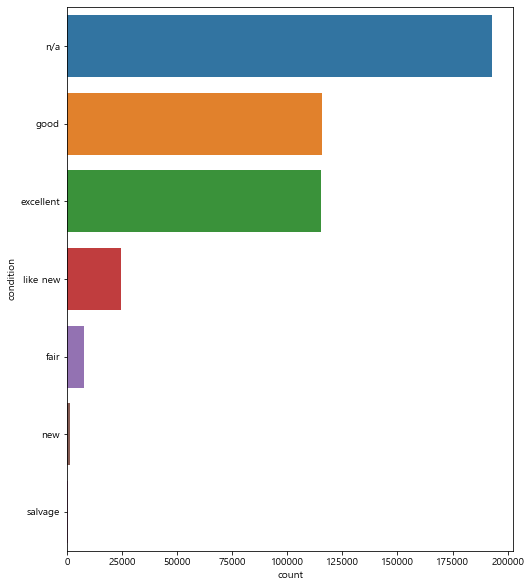

In [127]:
countplot('condition')

- salvage : 상태가 매우 안좋은 것을 의미
- n/a 값이 가장 많다. 
    - 차량 상태를 명확히 보여주지 않기 위해 입력 자체를 하지 않았을 가능성이 있어 보인다.
    - 차량 상태에 관련된 변수(age, odometer 등)를 통해 유추해서 채워넣는 등 전처리를 시도해볼 필요성 있음

### 4) cylinders

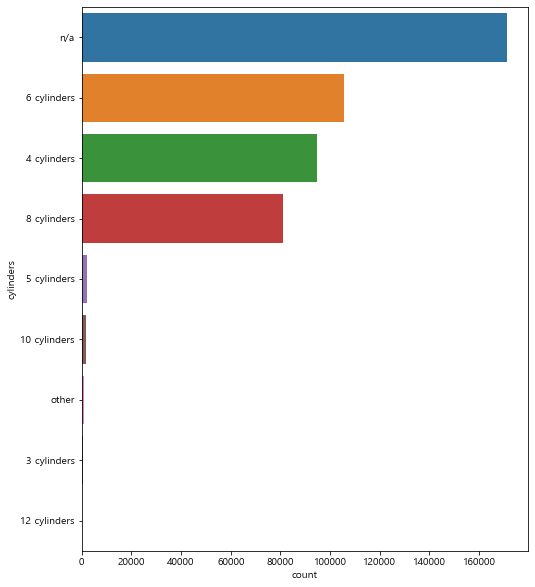

In [128]:
countplot('cylinders')

- n/a값이 대부분을 차지
- 여러가지 전처리 방식을 고민해볼 필요가 있다.
    - 데이터 수가 소수인 값들을 n/a에 포함시켜서 분석을 진행 하는 방식
    - n/a 데이터를 다른 컬럼으로 유추해서 채워넣는 방식

### 5) fuel

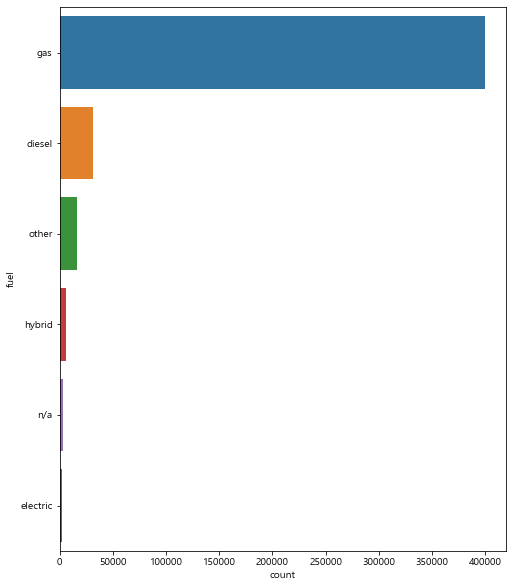

In [129]:
countplot('fuel')

- 대부분 gas 차량

### 6) transmission

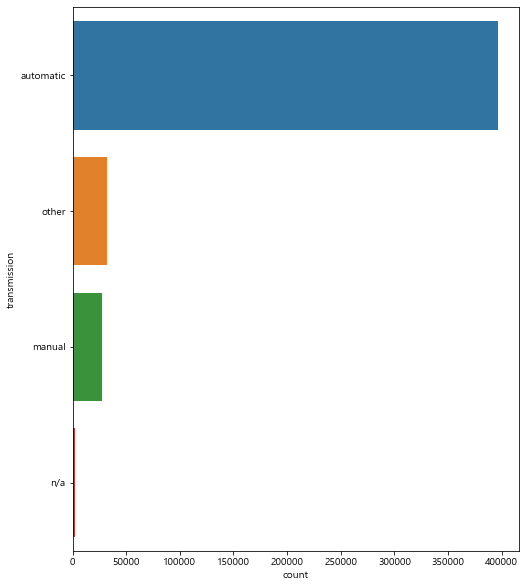

In [130]:
countplot('transmission')

- 대부분이 automatic 차량
- n/a값이 적어서 drop해도 분석에 지장 없을 듯

### 7) drive

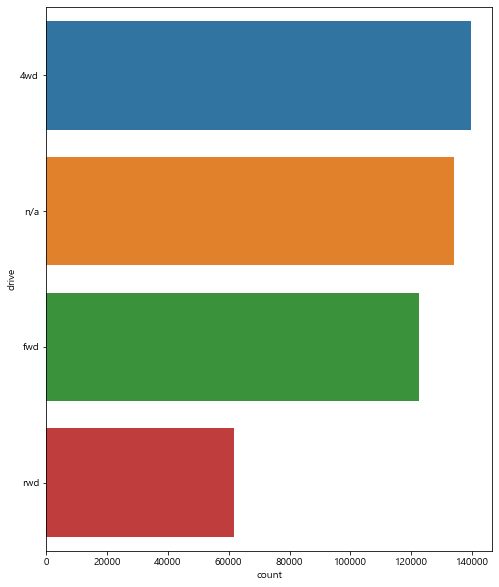

In [131]:
countplot('drive')

- 전반적으로 데이터 분포가 고른편
- 별다른 전처리 없이 학습시켜도 될 듯 하다.

### 8) size

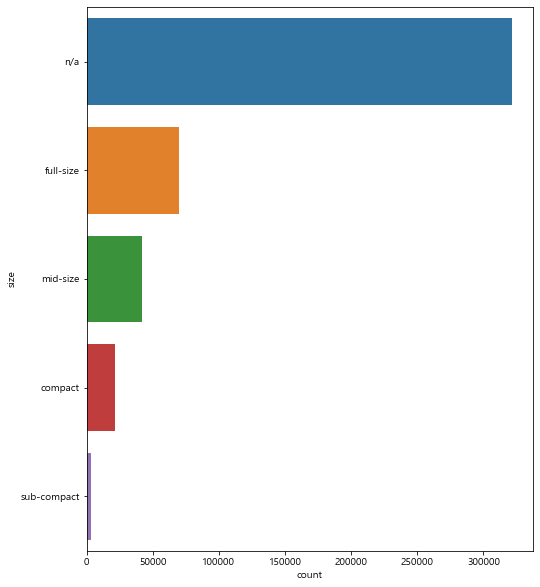

In [132]:
countplot('size')

- n/a가 가장 많다.
- 통계적 분석 결과에 따라 유의미할 것으로 판단되면 사용하되, 그렇지 않으면 제거하는 것을 고려

### 9) type

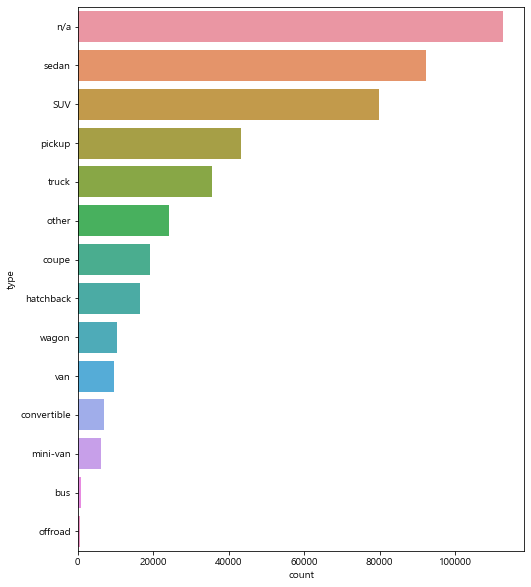

In [133]:
countplot('type')

- n/a가 가장 많다.

### 10) paint_color

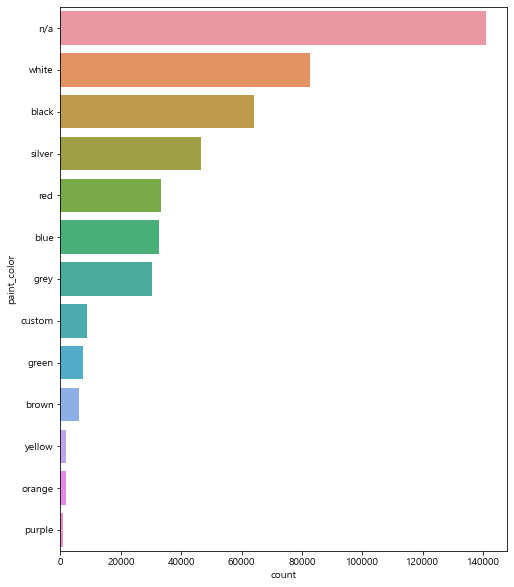

In [134]:
countplot('paint_color')

- n/a값이 가장 많다.
- custom에 따른 가격차이를 확인해볼 필요 있음
    - custom은 취향 차이에 따라 호불호가 갈릴 수 있을 것 같음.(=어떤 의미론 유의미한 값이 될 가능성이 있음)

## 수치형 데이터 분석

- 데이터의 범위가 너무 넓고 많은 경우 histplot은 ram할당량 초과로 연산이 안되는 경우가 많다.
- 특히, price의 경우 df.describe()로 확인했을때도 데이터의 분포가 이상할 것으로 예상되었다.

### 1) price

<AxesSubplot:xlabel='price'>

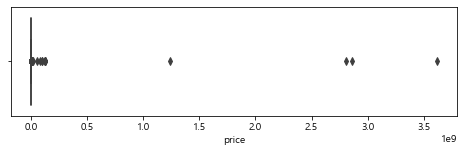

In [135]:
fig = plt.figure(figsize=(8, 2))
sns.boxplot(x='price', data=df)

- boxplot으로 보기엔 데이터의 분포등을 확인하긴 어렵다.
- outliers가 상당히 많다는 것은 대략적으로 파악 가능하다.
- 이럴땐 rugplot(x,y축 기반 주변 분포도, 개별 데이터 위치 파악 용이)으로 시각화 해보는 것이 데이터 분포 파악에는 더 유용하다.

<AxesSubplot:xlabel='price'>

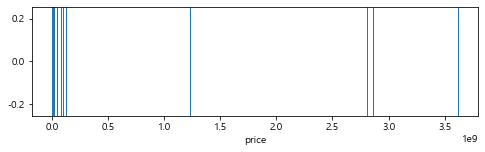

In [136]:
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='price', data=df, height=1)

- 1e9(10의 9승) 인 outlier는 제외하더라도, 데이터가 한쪽에 너무 치중되어 있어 유의미한 통계적 의미를 찾기가 어렵다.

### 2) odometer
- df.describe()로 봤을때, 이상치로 예상되는 값의 크기가 상당했다.

<AxesSubplot:xlabel='odometer'>

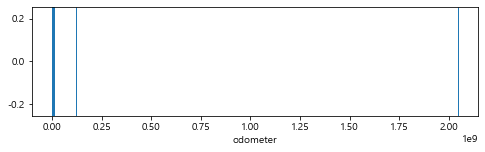

In [137]:
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='odometer', data=df, height=1)

- 1e9(10의 9승) 인 outlier는 제외하더라도, 데이터가 한쪽에 너무 치중되어 있어 유의미한 통계적 의미를 찾기가 어렵다.

### 3) age

<AxesSubplot:xlabel='age', ylabel='Count'>

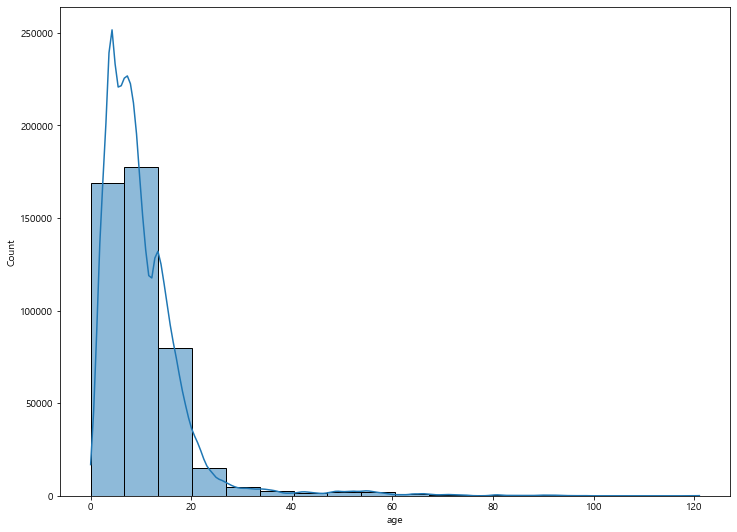

In [138]:
sns.histplot(x='age', data=df, bins=18, kde=True)

- 5 ~ 10년 정도 된 차량이 가장 많은 분포를 보인다.

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        458213 non-null  object 
 1   price         458213 non-null  int64  
 2   manufacturer  439993 non-null  object 
 3   model         453367 non-null  object 
 4   condition     265273 non-null  object 
 5   cylinders     287073 non-null  object 
 6   fuel          454976 non-null  object 
 7   odometer      402910 non-null  float64
 8   title_status  455636 non-null  object 
 9   transmission  455771 non-null  object 
 10  drive         324025 non-null  object 
 11  size          136865 non-null  object 
 12  type          345475 non-null  object 
 13  paint_color   317370 non-null  object 
 14  age           457163 non-null  float64
dtypes: float64(2), int64(1), object(12)
memory usage: 52.4+ MB


# 데이터 클리닝

## 범주형 데이터 시각화 & 분석

- 범주형 데이터 x price 의 연관성 분석

<AxesSubplot:xlabel='manufacturer', ylabel='price'>

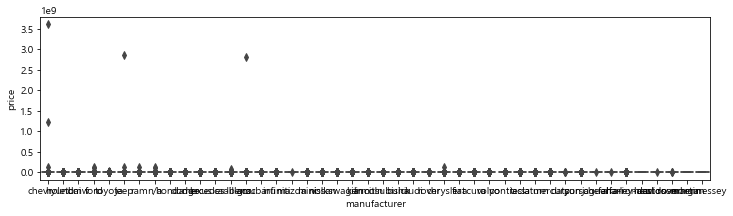

In [140]:
# Boxplot 계열로 범주형 데이터를 시각화하여 분석
# null값은 n/a로 채워서 확인
fig = plt.figure(figsize=(12, 3))
sns.boxplot(x='manufacturer', y='price', data=df.fillna('n/a'))

<AxesSubplot:xlabel='fuel', ylabel='price'>

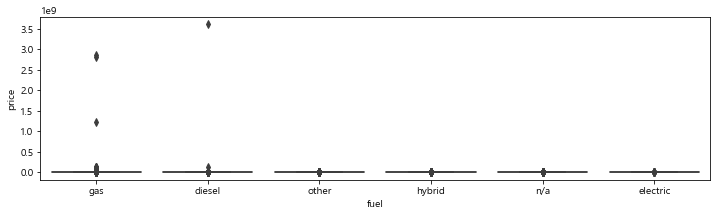

In [141]:
fig = plt.figure(figsize=(12, 3))
sns.boxplot(x='fuel', y='price', data=df.fillna('n/a'))

- 위에서 대략적으로 살펴보았듯이 n/a값이 너무 많거나, 데이터가 특정 범주에 몰려있는 경우가 많다.<br>
- 이로 인해 시각화를 하여도 제대로된 분석을 하기가 어렵다.<br>
- 데이터 클리닝을 통해 한번 정제해줄 필요가 있다.<br>
- **범주형 데이터와 수치형 데이터 클리닝을 진행한 후**에 다시 시각화 & 분석을 시도해야 한다.

## 범주형 데이터 클리닝

- 범주형 데이터(categorical)를 클리닝할 경우 보통 4가지 방법중 하나를 사용한다.
    - null 데이터가 포함된 row를 제거
    - null 데이터를 others로 치환하기
    - 너무 소수의 값만을 보유한 범주를 others로 치환하기
    - classifier를 학습시켜, null 데이터를 추정하여 채워넣기

### 1) manufacturer

- 너무 소수의 값만을 보유한 범주를 others로 치환하기

In [142]:
# null값들을 others로 값을 부여 
# 시각화 , value_counts 등을 할때 제대로 결과가 나오도록 하기 위함.

# category 별 counts가 많은 데이터부터 내림차순으로 보여진다.
df['manufacturer'].fillna('others').value_counts()

ford               79666
chevrolet          64977
toyota             38577
honda              25868
nissan             23654
jeep               21165
others             18220
ram                17697
gmc                17267
dodge              16730
bmw                12352
hyundai            10975
mercedes-benz      10628
subaru             10510
volkswagen         10489
kia                 8854
chrysler            7499
lexus               7119
cadillac            6743
buick               6009
mazda               5931
audi                5583
acura               4008
infiniti            3714
lincoln             3338
pontiac             3037
volvo               2866
mini                2330
mitsubishi          2301
porsche             1779
rover               1662
mercury             1645
saturn              1393
tesla               1067
jaguar              1060
fiat                 955
alfa-romeo           187
harley-davidson      139
ferrari               96
datsun                63


In [143]:
# 범주형 데이터 시각화용 함수 생성
# 변곡점 그리는 함수 기본 설정은 convex
# 필요시 변경 가능
def viz_val_counts(col, shape='convex'):
    
    # 데이터 입력
    counts = df[col].fillna('others').value_counts()
    x = range(len(counts))
    
    # 변곡점(elbow point) 찾기
    from kneed import KneeLocator
    kn = KneeLocator(x, counts, curve=shape, direction='decreasing')
    
    # 격자 설정
    plt.grid(True, color='lightgray', zorder=0) 
    
    # 시각화
    plt.plot(x, counts)
    
    # elbow point 그리기
    plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', color='r')
    
    # elbow point 수치 표시
    plt.text(kn.knee + 0.3, counts.max(), f'Elbow point is : {kn.knee}', fontsize = 15, color='red')
    
    # 시각화한 범주형 변수들의 value_counts출력
    print(counts)

# 결과 확인용 value_counts 함수 생성
def val_counts(col):
    return df[col].value_counts()

- 각 컬럼(카테고리) 의 개수가 몇개인지 시각화 하는 그래프
- category 값이 너무 많기 때문에, 일일히 category명이 들어가도록 시각화 하면 데이터를 제대로 살피기 어려움
- 소수 값을 가진 category는 others로 치환할 것이기 때문에 변수명이 중요하진 않음
- elbow point(변곡점)을 시각화
    - others에 포함시킬 변수를 몇개로 정할지 참조할 때 사용.

In [144]:
def viz_val_counts2(col, num, shape='convex'):
    
    # 데이터 입력
    counts = df[col].fillna('others').value_counts()
    x = range(len(counts[:num]))
    
    # 변곡점(elbow point) 찾기
    from kneed import KneeLocator
    kn = KneeLocator(x, counts[:num], curve=shape, direction='decreasing')
    
    # 격자 설정
    plt.grid(True, color='lightgray', zorder=0) 
    
    # 시각화
    plt.plot(x, counts[:num])
    
    # elbow point 그리기
    plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', color='r')
    
    # elbow point 수치 표시
    plt.text(kn.knee+0.3, counts.max(), f'Elbow point is : {kn.knee}', fontsize = 15, color='red')
    
    # 시각화한 범주형 변수들의 value_counts출력
    print(counts)

- 데이터가 극단적으로 몰려있을때, 세부적으로 조정하여 보고자 할때 사용

ford               79666
chevrolet          64977
toyota             38577
honda              25868
nissan             23654
jeep               21165
others             18220
ram                17697
gmc                17267
dodge              16730
bmw                12352
hyundai            10975
mercedes-benz      10628
subaru             10510
volkswagen         10489
kia                 8854
chrysler            7499
lexus               7119
cadillac            6743
buick               6009
mazda               5931
audi                5583
acura               4008
infiniti            3714
lincoln             3338
pontiac             3037
volvo               2866
mini                2330
mitsubishi          2301
porsche             1779
rover               1662
mercury             1645
saturn              1393
tesla               1067
jaguar              1060
fiat                 955
alfa-romeo           187
harley-davidson      139
ferrari               96
datsun                63


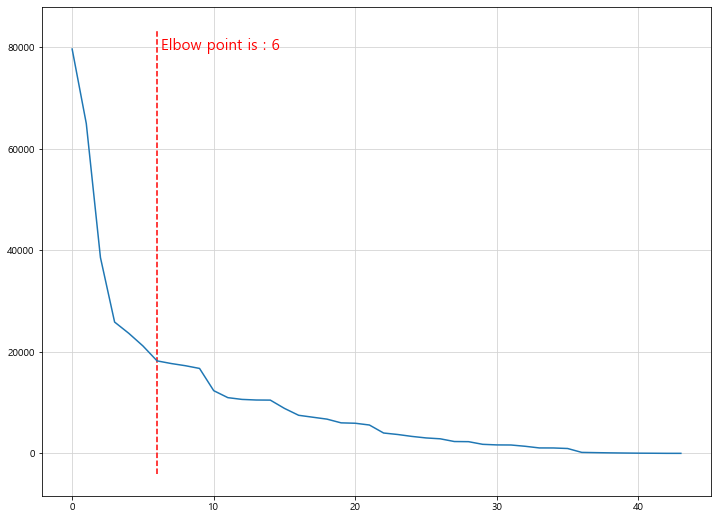

In [145]:
# 시각화 결과 
viz_val_counts('manufacturer')

In [146]:
# 해당 그래프의 category 명을 확인하고자 한다면 아래와 같이 확인 가능
# counts가 value_counts를 해서 내림차순 정렬된 것이기 때문에 앞에 나오는 값일 수록 데이터가 많은 것.
df['manufacturer'].fillna('others').value_counts().index

Index(['ford', 'chevrolet', 'toyota', 'honda', 'nissan', 'jeep', 'others', 'ram', 'gmc', 'dodge', 'bmw', 'hyundai', 'mercedes-benz', 'subaru', 'volkswagen', 'kia', 'chrysler', 'lexus', 'cadillac', 'buick', 'mazda', 'audi', 'acura', 'infiniti', 'lincoln', 'pontiac', 'volvo', 'mini', 'mitsubishi', 'porsche', 'rover', 'mercury', 'saturn', 'tesla', 'jaguar', 'fiat', 'alfa-romeo', 'harley-davidson', 'ferrari', 'datsun', 'aston-martin', 'land rover', 'morgan', 'hennessey'], dtype='object')

- 상위 10개의 데이터만 category로 남기고, 나머지는 others로 치환
- 급격히 감소하는 지점은 6개이지만, 범주값이 너무 적어서 10개로 지정

- others로 치환하는 함수 생성
```python
def to_others(col, n_categorical):
    counts = df[col].fillna('others').value_counts()
    df[col] = df[col].apply(lambda s: s if str(s) not in counts.index[n_categorical:] else 'others')
```

 - 위의 함수가 기본 형식.
 - 다만 유지해야할 범주의 개수보다 drop해야할 범주의 개수가 더 많을 경우 labmda 연산에서 counts.index[n_categorical:] 를 매번 불러오기 때문에 매우 오래 걸린다.
 - 따라서 미리 counts.index[n_categorical:] 를 변수화 하여 사용하면 메모리 부하를 줄일 수 있다. (아래 함수 참조)

In [147]:
# 지정한 개수 이외의 범주들을 others로 만드는 함수 생성
def to_others(col, n_categorical):
    counts = df[col].fillna('others').value_counts()
    others = counts.index[n_categorical:]
    df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

- n_categorical에 others 포함 총 몇개의 범주변수로 만들 것인지 입력
- 시각화한 그래프로 확인한 변곡점을 기반으로 선택한 범주화의 값을 입력하여 변경

In [148]:
# 총 10개의 범주로 변경
to_others('manufacturer',10)

# 결과 시각화
val_counts('manufacturer')

others       134392
ford          79666
chevrolet     64977
toyota        38577
honda         25868
nissan        23654
jeep          21165
ram           17697
gmc           17267
dodge         16730
Name: manufacturer, dtype: int64

- 데이터의 구성이 클리닝 전에 비해 훨씬 단순해지고 깔끔해졌다.

### 2) region

columbus               3818
rochester              3592
jacksonville           3504
springfield            3293
fayetteville           2990
                       ... 
siskiyou county          28
susanville               17
west virginia (old)      11
fort smith, AR           11
sioux city, IA            1
Name: region, Length: 405, dtype: int64


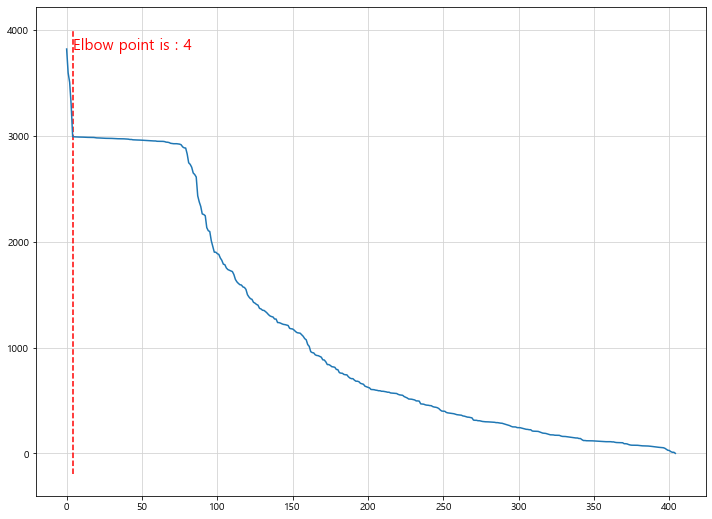

In [149]:
viz_val_counts('region')

- elbow point는 4, 상위 5개로 범주화
- 405개의 범주를 모두 사용하면 좋지만, 이 경우 차원의 저주 문제를 피하기 어려워 최대한 단순화 하고자 함.

In [150]:
to_others('region',5)

# 결과 확인
val_counts('region')

others          441016
columbus          3818
rochester         3592
jacksonville      3504
springfield       3293
fayetteville      2990
Name: region, dtype: int64

### 3) model

f-150                 8370
silverado 1500        5964
others                4846
1500                  4211
camry                 4033
                      ... 
MG MGB Roadster          1
1997 Astro van AWD       1
rogue sv awd cvt         1
HUMMER H-3               1
caravana                 1
Name: model, Length: 31521, dtype: int64


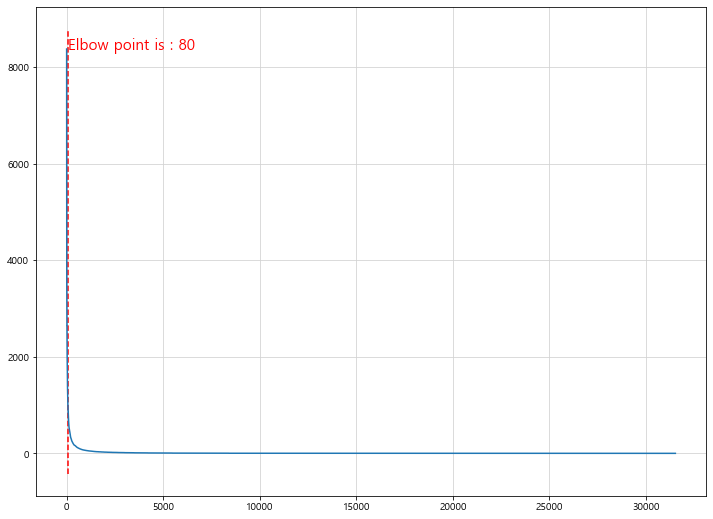

In [151]:
# raw 상태의 분포 확인
viz_val_counts('model')

- 분포가 매우 극단적 (상위 소수에 값이 몰려있다.)
- 조금 더 자세하게 들여다볼 필요가 있다.

f-150                 8370
silverado 1500        5964
others                4846
1500                  4211
camry                 4033
                      ... 
MG MGB Roadster          1
1997 Astro van AWD       1
rogue sv awd cvt         1
HUMMER H-3               1
caravana                 1
Name: model, Length: 31521, dtype: int64


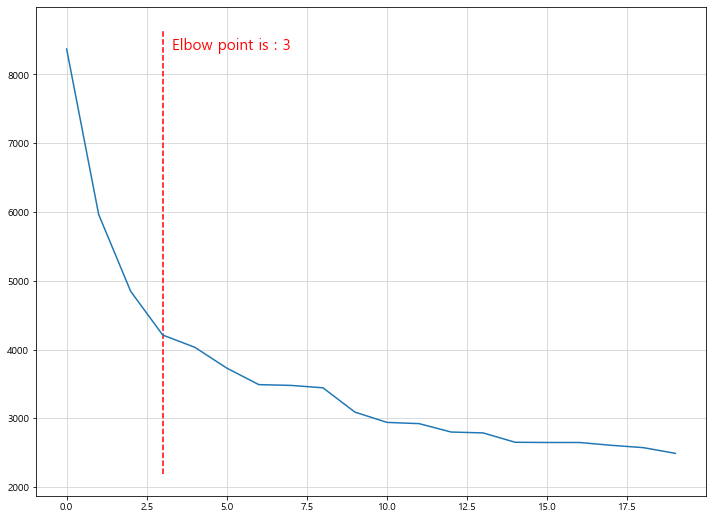

In [152]:
viz_val_counts2('model',20)

- 상위 20개 범주로만 봤을때의 변곡점은 3이지만, 최대한 많은 변수를 가져가기 위해 10개로 범주화
- 급격히 감소하는 구간을 거의다 포함할 수 있을 것으로 기대

In [153]:
to_others('model', 10)

# 결과 확인
val_counts('model')

others            413556
f-150               8370
silverado 1500      5964
1500                4211
camry               4033
accord              3730
altima              3490
civic               3479
escape              3444
silverado           3090
Name: model, dtype: int64

### 4) condition

others       192940
good         115685
excellent    115206
like new      24553
fair           7740
new            1428
salvage         661
Name: condition, dtype: int64


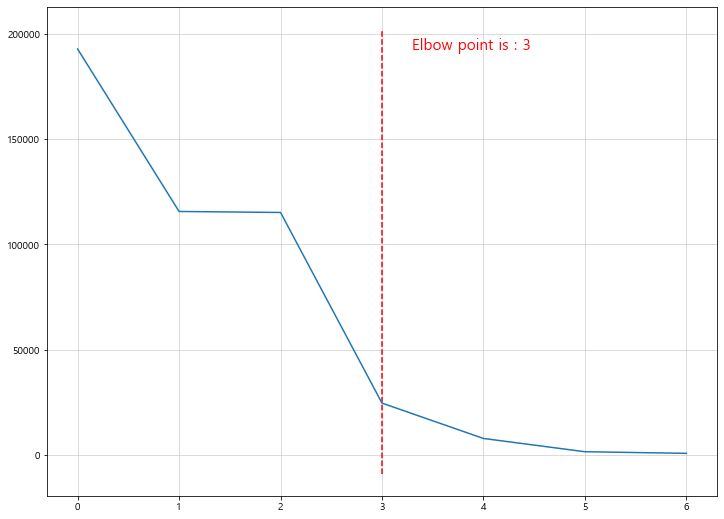

In [154]:
viz_val_counts('condition')

- 변곡점에 해당하는 3을 기준으로 others 로 치환해도 될 것 같다.

In [155]:
to_others('condition', 3)

# 결과 확인
val_counts('condition')

good         115685
excellent    115206
others        34382
Name: condition, dtype: int64

### 5) cylinders

others          171140
6 cylinders     105677
4 cylinders      94767
8 cylinders      81179
5 cylinders       2058
10 cylinders      1543
other             1112
3 cylinders        550
12 cylinders       187
Name: cylinders, dtype: int64


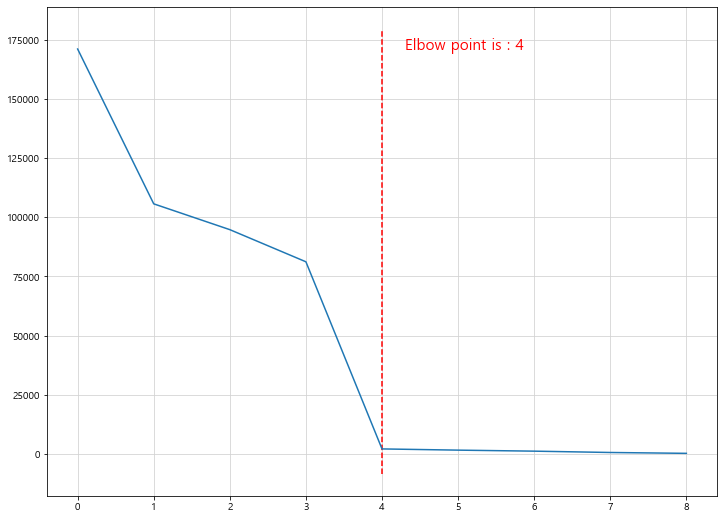

In [156]:
viz_val_counts('cylinders')

- 변곡점인 4부터 데이터 개수가 거의 같다.
- 변곡점을 기준으로 others로 치환한다.

In [157]:
to_others('cylinders', 4)

# 결과 확인
val_counts('cylinders')

6 cylinders    105677
4 cylinders     94767
8 cylinders     81179
others           5450
Name: cylinders, dtype: int64

### 6) fuel

gas         399399
diesel       31077
other        16359
hybrid        5790
others        3237
electric      2351
Name: fuel, dtype: int64


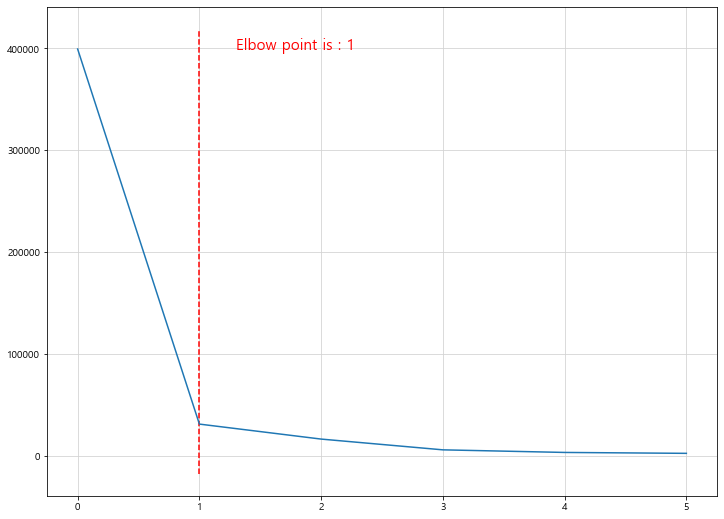

In [158]:
viz_val_counts('fuel')

- 변곡점은 1이다. 
- 가급적 많은 데이터를 살리기 위해 그래프의 기울기변화가 거의 없는 3을 기준으로 클리닝 진행
- other가 이미 있으므로, 함수에 들어갈 기준값은 2로 입력해서 other이 others가 되도록 진행

In [159]:
to_others('fuel', 2)

# 결과 확인
val_counts('fuel')

gas       399399
diesel     31077
others     24500
Name: fuel, dtype: int64

### 7) title_status

clean         439626
rebuilt         8698
salvage         4233
others          2577
lien            2091
missing          794
parts only       194
Name: title_status, dtype: int64


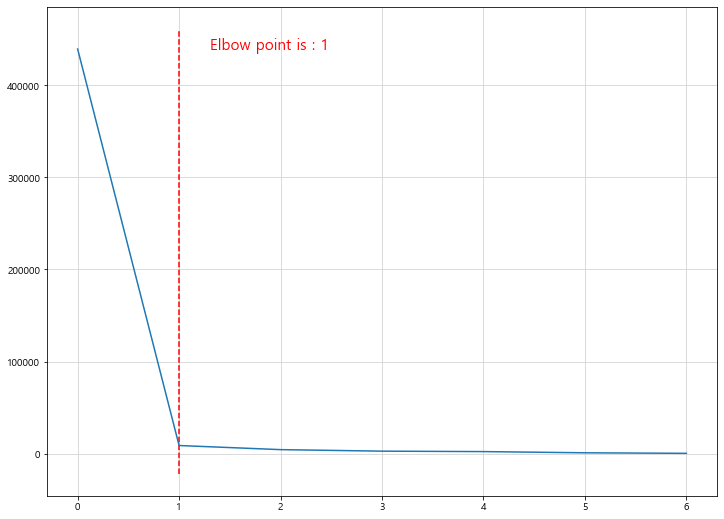

In [160]:
viz_val_counts('title_status')

- clean 이 대부분
- 도메인 지식 검색 결과 cat title은 차량 소유에 필요한 '서류' 
- 특별히 필요한 데이터가 아닌 듯 하여 drop 하기로 결정

In [161]:
df.drop('title_status', axis=1, inplace=True)

### 8) transmission

automatic    396322
other         32186
manual        27263
others         2442
Name: transmission, dtype: int64


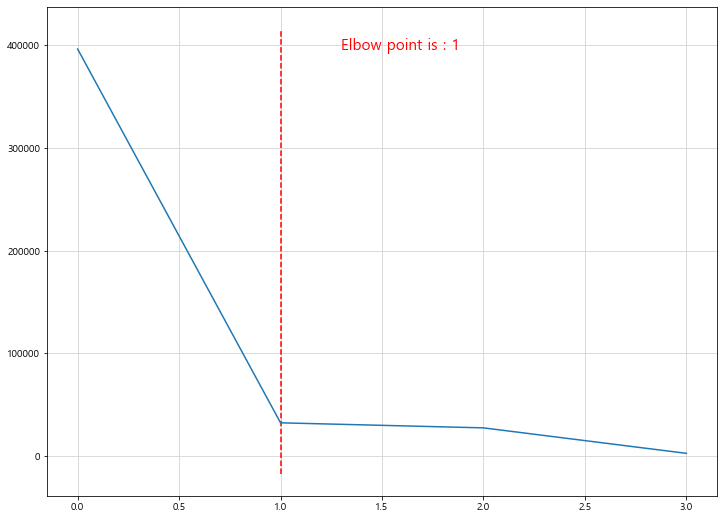

In [162]:
viz_val_counts('transmission')

- 변곡점은 1이지만, 기존 데이터가 3개 카테고리로 잘 분류되어 있어 추가 처리가 필요 없다.

### 9) drive

4wd       139693
others    134188
fwd       122602
rwd        61730
Name: drive, dtype: int64


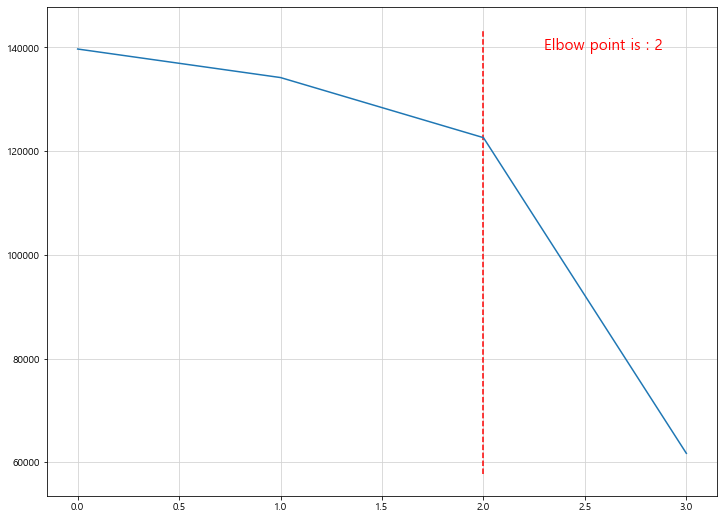

In [163]:
viz_val_counts('drive','concave')

- 변곡점은 2 이지만, 값이 차이가 나는 3의 경우도 약 6만개의 데이터가 있으므로 그대로 사용

### 10) size

others         321348
full-size       69736
mid-size        41782
compact         21825
sub-compact      3522
Name: size, dtype: int64


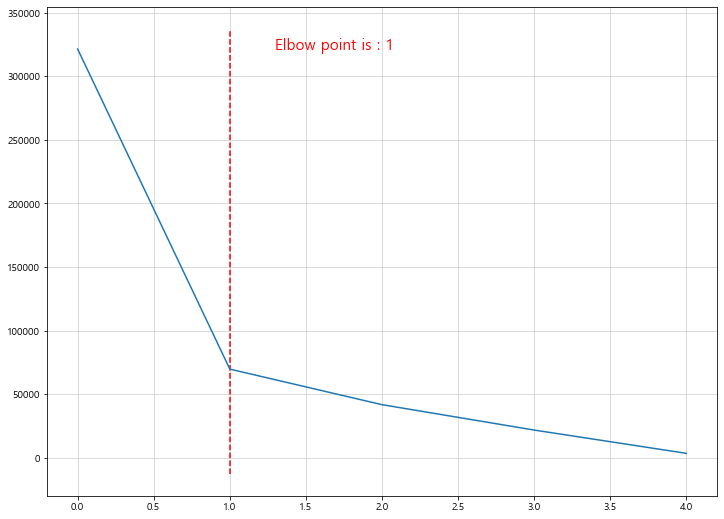

In [164]:
viz_val_counts('size')

- 변곡점은 1
- 2부터 기울기가 줄어드는 것을 감안하여 최종 2개의 카테고리 값을 갖도록 조정

In [165]:
to_others('size', 2)

# 결과 확인
val_counts('size')

full-size    69736
others       67129
Name: size, dtype: int64

### 11) type

others         112738
sedan           92364
SUV             79882
pickup          43343
truck           35694
other           24160
coupe           19106
hatchback       16388
wagon           10473
van              9574
convertible      6864
mini-van         6263
bus               717
offroad           647
Name: type, dtype: int64


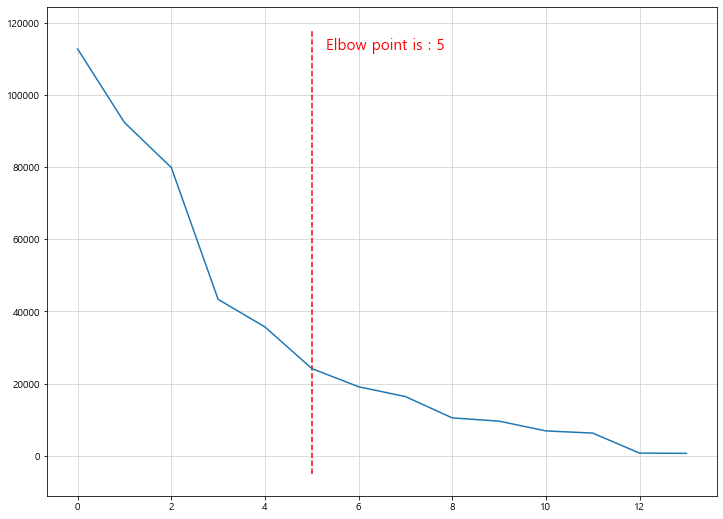

In [166]:
viz_val_counts('type')

- 변곡점은 5
- 상대적으로 기울기가 완만해지는 8을 기준으로 클리닝

In [167]:
# other과 others가 같이 있어서 컬럼명 변경하고 클리닝 진행
df.loc[df['type'] == 'other', 'type'] = 'others'

# 8개 범주로 클리닝
to_others('type', 8)


# 결과 확인
val_counts('type')

sedan        92364
SUV          79882
others       48225
pickup       43343
truck        35694
coupe        19106
hatchback    16388
wagon        10473
Name: type, dtype: int64

### 12) paint_color

others    140843
white      82786
black      64145
silver     46722
red        33274
blue       32746
grey       30455
custom      8843
green       7631
brown       6028
yellow      2002
orange      1970
purple       768
Name: paint_color, dtype: int64


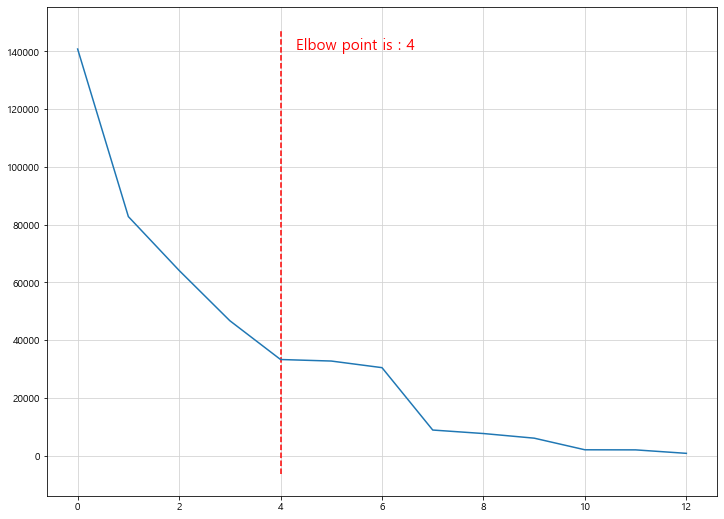

In [168]:
viz_val_counts('paint_color')

- 변곡점은 3
- 기울기가 완만해지는 7을 기준으로 클리닝 진행

In [169]:
to_others('paint_color', 7)

# 결과 확인
val_counts('paint_color')

white     82786
black     64145
silver    46722
red       33274
blue      32746
grey      30455
others    27242
Name: paint_color, dtype: int64

## 수치형 데이터 클리닝

### 1) price

- 시각화하였을때 확인한 비정상적으로 높거나 낮은 이상치들을 제거해줄 필요가 있음

In [170]:
# quantile() 메소드를 이용하여 outlier 제거하고 시각화하여 확인
p1 = df['price'].quantile(0.99) # 상위 1% / 59900
p2 = df['price'].quantile(0.1) # 하위 10% / 651 (0.05까지는 0원)
print(p1, p2)

59900.0 651.0


In [171]:
# df에서 price 기준 대응되는 데이터의 범위를 재설정
df = df[(p1 > df['price']) & (df['price'] > p2)]

### 2) odometer

In [172]:
o1 = df['odometer'].quantile(0.99)
o2 = df['odometer'].quantile(0.1)
print(o1, o2)

272803.10999999824 18593.0


In [173]:
df = df[(o1 > df['odometer']) & (df['odometer'] > o2)]

In [174]:
df.describe()

,price,odometer,age
count,322166.00,322166.00,321666.00
mean,15211.24,103341.83,10.22
std,11248.54,55049.52,7.07
min,652.00,18596.00,0.00
25%,6500.00,57454.00,6.00
50%,12000.00,98850.00,9.00
75%,20990.00,141000.00,13.00
max,59895.00,272742.00,121.00


- price
    - mean값과 중앙값(50%)가 비슷해졌다 = 가우시안 분포에 가까워 졌다.
    - 상위 25%값과 max값의 단위가 동일해졌다.
    
- odometer
    - mean값과 중앙값(50%)이 비슷해졌다. (상동) = 어느정도 과도하게 큰 값들은 quantile을 통해 클리닝이 되었다.
    - 상위 25%값과 max값이 단위는 다르지만 그 격차가 많이 해소되었다. 
    
    
- 결론적으로 상위 1%와 하위 10%를 클리닝 한 것은 적절한 조치였다.

## 범주형 데이터 시각화 & 분석(2)

- 범주형 데이터 x price 의 연관성 분석

In [175]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'size', 'type', 'paint_color', 'age'], dtype='object')

In [176]:
# Boxplot 계열로 범주형 데이터를 시각화하여 분석하기

# boxplot 그리는 함수생성
def boxplot(x):
    fig = plt.figure(figsize=(14, 7))
    sns.boxplot(x=x, y='price', palette='Spectral', data=df);

## 1) manufacturer X price

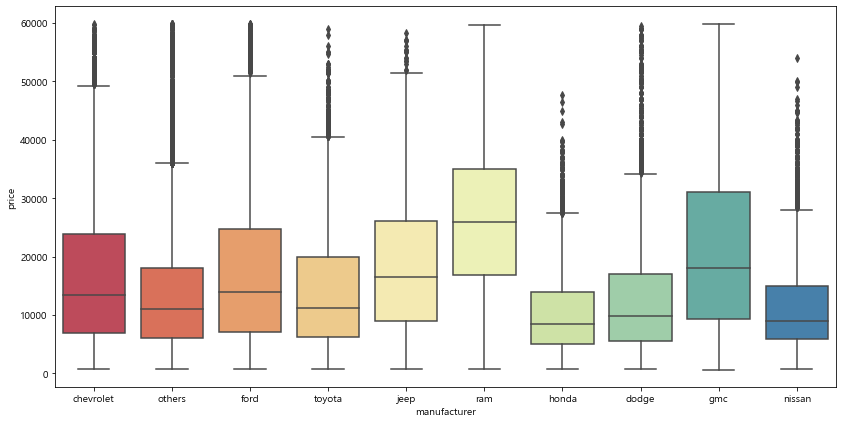

In [177]:
# Boxplot 계열로 범주형 데이터를 시각화하여 분석하기
boxplot('manufacturer')

- 모델별 평균 price의 차이가 존재한다. 
- price의 범위는(이상치를 포함하면) 대체로 거의 비슷하다. 
- (강력하진 않지만) 대략적으로 price를 결정짓는데 주요 요소중 하나가 될 수 있을 것으로 판단된다.

## 2) region X price

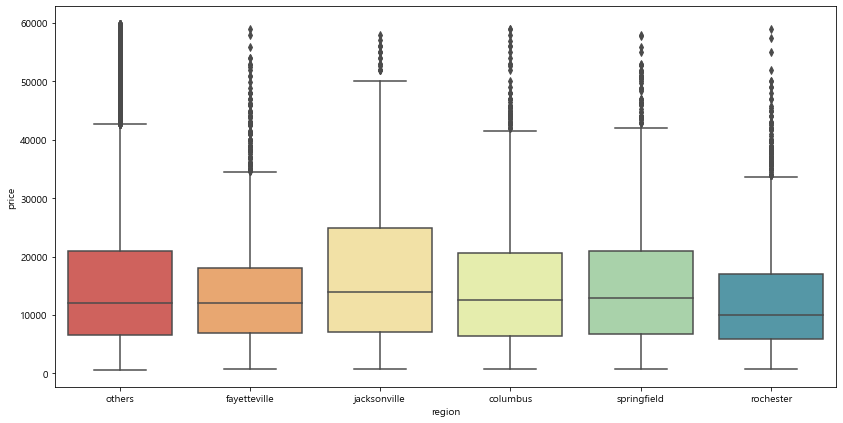

In [178]:
boxplot('region')

- 지역별로 평균 가격에는 큰 차이가 없다.
- 

## 3) model X price

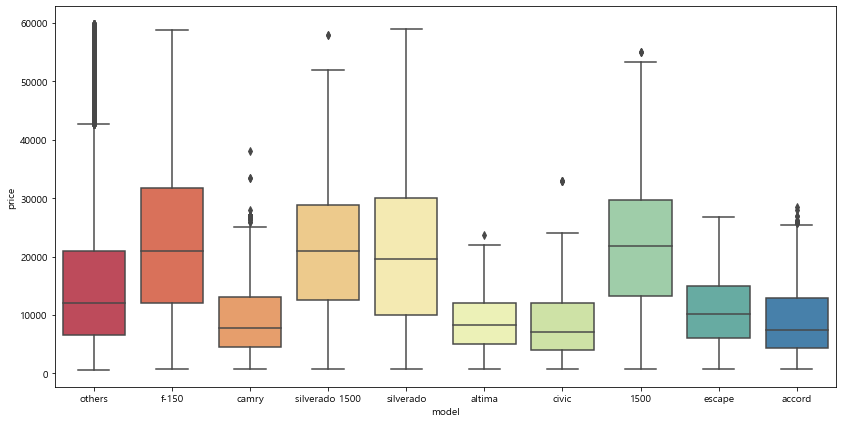

In [179]:
boxplot('model')

- 상대적으로 가격범위가 낮은 저렴한 모델들의 판매량이 많다.
- 저가 모델 그룹과 고가 모델 그룹으로 나누어지는 현상이 눈에 띈다.
- 동일 모델이어도 값의 범위 차이가 나는 것으로 보아 condition등 다른 요소에 의해 가격 차이가 발생하는 것으로 예상된다.

## 4) condition X price

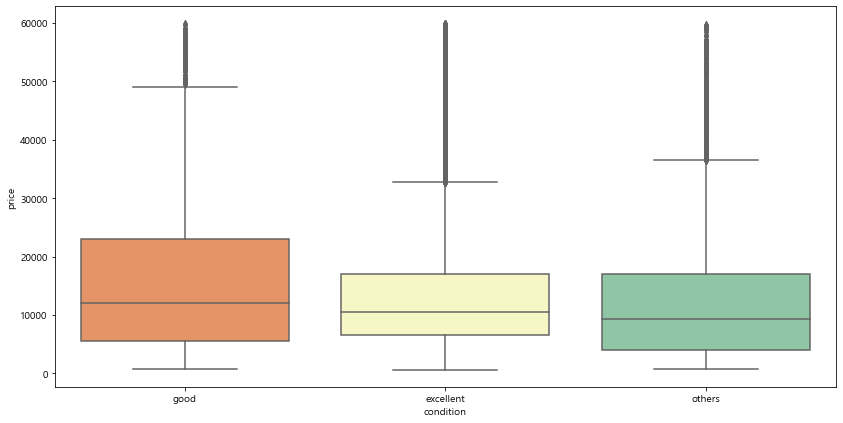

In [180]:
boxplot('condition')

## 5) cylinders X price

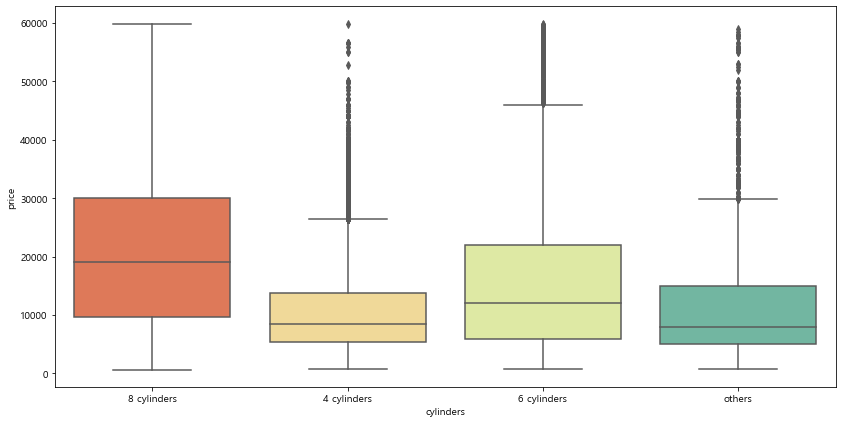

In [181]:
boxplot('cylinders')

## 6) fuel X price

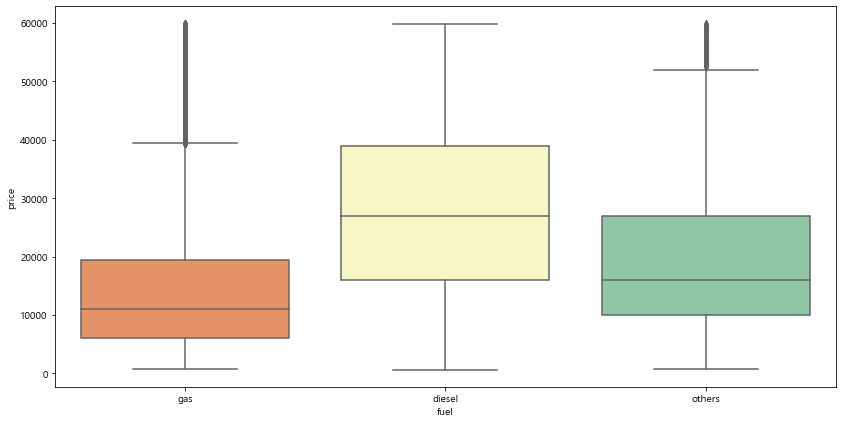

In [182]:
boxplot('fuel')

## 7) transmission X price

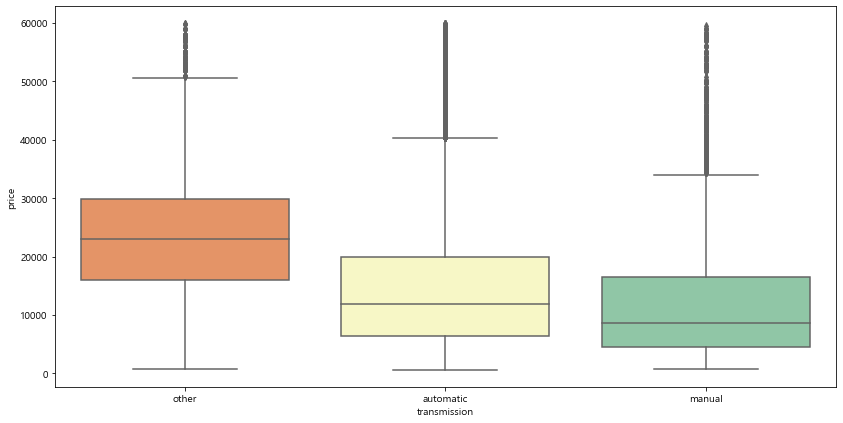

In [183]:
boxplot('transmission')

## 8) drive X price

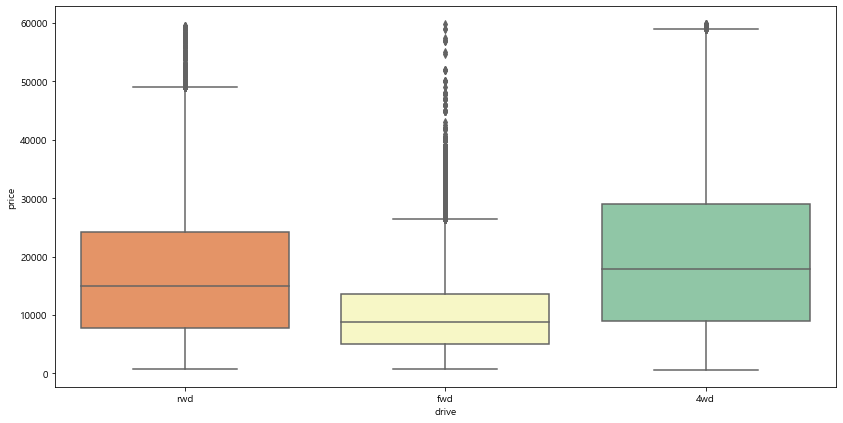

In [184]:
boxplot('drive')

## 9) size X price

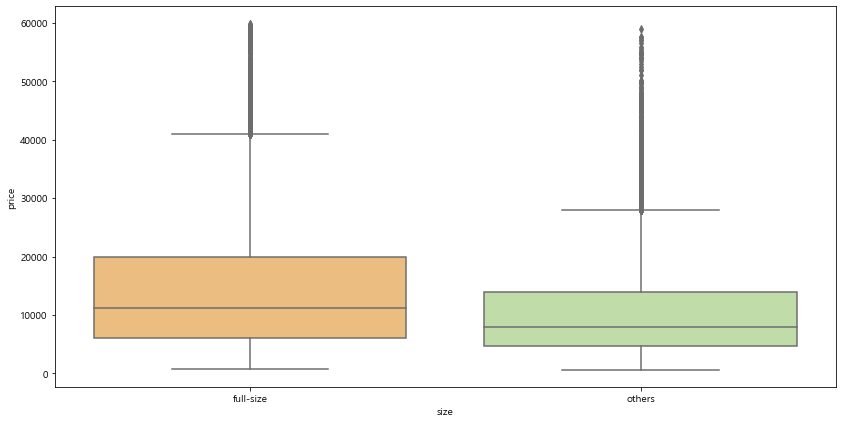

In [185]:
boxplot('size')

## 10) type X price

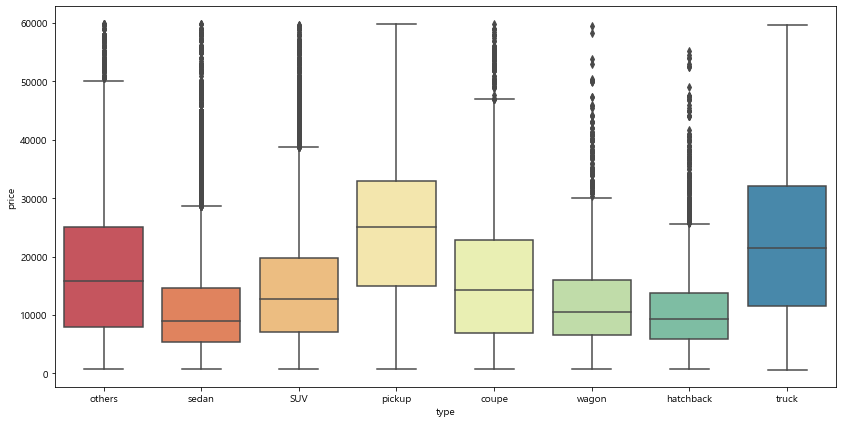

In [186]:
boxplot('type')

## 11) paint_color X price

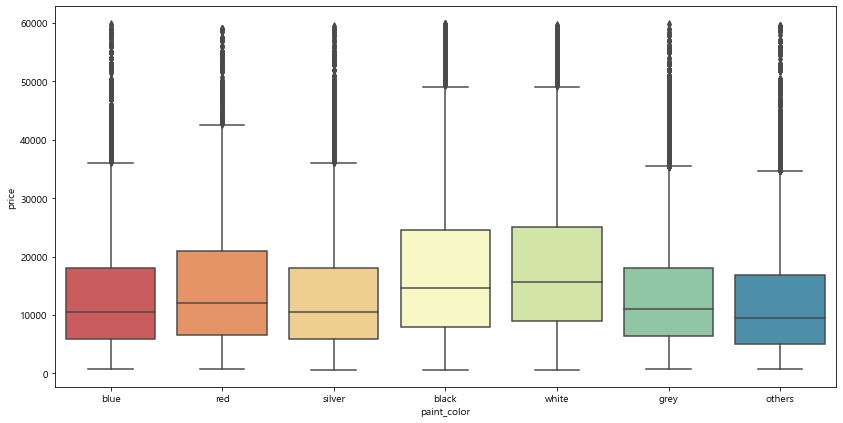

In [187]:
boxplot('paint_color')

### 컬럼별 correlation 확인

<AxesSubplot:>

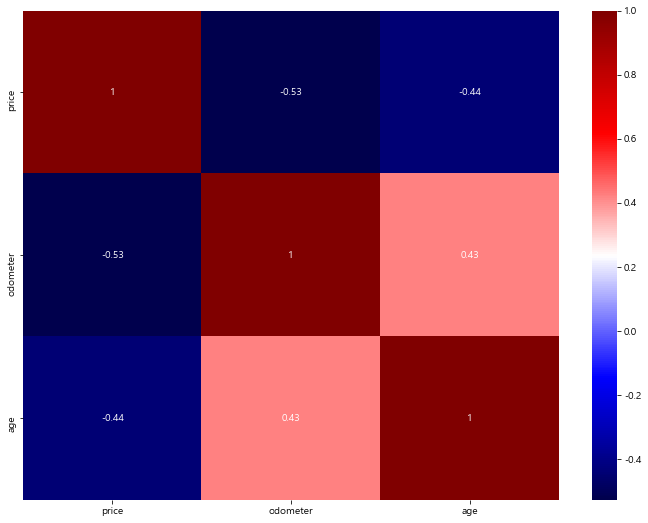

In [188]:
sns.heatmap(df.corr(), annot=True, cmap='seismic')

- price와 odometer은 서로 강한 음의 상관관계를 갖는다. (-0.53)
- odometer와 age간의 상관관계도 0.43으로 양의 상관관계를 갖는다. 

# 모델링

## 모델링용 전처리 (StandarsScaler)

In [189]:
from sklearn.preprocessing import StandardScaler

In [190]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기

# Saleprice는 y label
X_num = df[['odometer', 'age']]

# 스케일러 지정
scaler = StandardScaler()

# feature데이터 스케일링
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)

# df로 재구성 (컬럼 & 인덱스 정보 )
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

# get_dummies로 범주형 데이터를 one-hot 벡터로 변경
X_cat = df.drop(['price', 'odometer', 'age'], axis=1)

# linear-regression을 할려면 (drop = True) 해줘야 함
X_cat = pd.get_dummies(X_cat)

# label & feature 데이터 통합
X = pd.concat([X_scaled, X_cat], axis=1)
y = df['price']

In [191]:
X.head()

,odometer,age,region_columbus,region_fayetteville,region_jacksonville,region_others,region_rochester,region_springfield,manufacturer_chevrolet,manufacturer_dodge,manufacturer_ford,manufacturer_gmc,manufacturer_honda,manufacturer_jeep,manufacturer_nissan,manufacturer_others,manufacturer_ram,manufacturer_toyota,model_1500,model_accord,model_altima,model_camry,model_civic,model_escape,model_f-150,model_others,model_silverado,model_silverado 1500,condition_excellent,condition_good,condition_others,cylinders_4 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_others,fuel_diesel,fuel_gas,fuel_others,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,size_full-size,size_others,type_SUV,type_coupe,type_hatchback,type_others,type_pickup,type_sedan,type_truck,type_wagon,paint_color_black,paint_color_blue,paint_color_grey,paint_color_others,paint_color_red,paint_color_silver,paint_color_white
0,-1.28,0.11,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,-0.18,-0.46,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,-0.30,0.68,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1.57,5.20,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,0.23,0.82,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [192]:
X.shape

(322166, 61)

In [193]:
X.isna().sum()

odometer                 0
age                    500
region_columbus          0
region_fayetteville      0
region_jacksonville      0
                      ... 
paint_color_grey         0
paint_color_others       0
paint_color_red          0
paint_color_silver       0
paint_color_white        0
Length: 61, dtype: int64

In [194]:
# 나이의 평균값으로 채워넣기
# StandardScaler을 통해 바뀐 값들이지만 그 평균값이 거의 0에 가깝다. (e-15)
X['age'].mean()

-1.6971181595987114e-15

In [195]:
# 비어있는 age 채워넣기 with 평균
X.fillna(0.0, inplace=True)

In [196]:
# 결과 확인
X.isna().sum()

odometer               0
age                    0
region_columbus        0
region_fayetteville    0
region_jacksonville    0
                      ..
paint_color_grey       0
paint_color_others     0
paint_color_red        0
paint_color_silver     0
paint_color_white      0
Length: 61, dtype: int64

## Train / Test split

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## 모델 학습 (XGBoost)

In [199]:
from xgboost import XGBRegressor

In [201]:
# XGBRegressor 모델 생성/학습
model_reg = XGBRegressor()
model_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## 모델 평가

In [202]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [204]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model_reg.predict(X_test)
print('MAE :',mean_absolute_error(y_test, pred))
print('MAE :',sqrt(mean_squared_error(y_test, pred)))

MAE : 3090.4056586937527
MAE : 4732.239157984601


## 모델 심화 분석

### 실제값 vs 예측값 시각화 (feat. scatter plot / histplot)

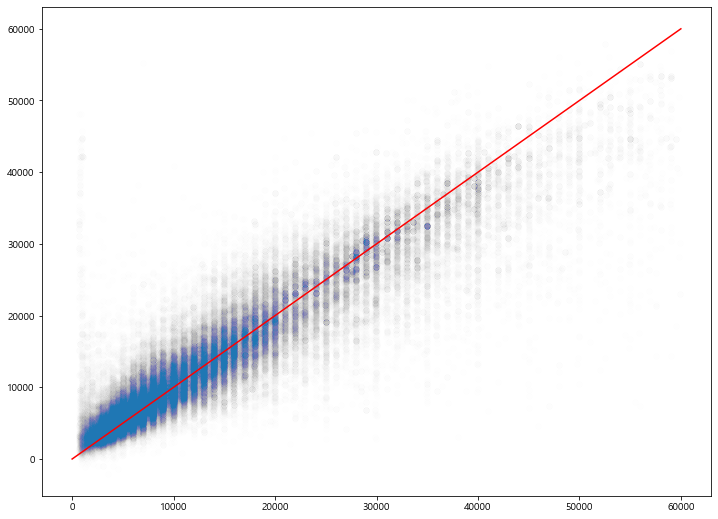

In [205]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
# Scatter로 시각적 확인이 어려울 경우, histplot 등 활용하는 것도 하나의 방법
plt.scatter(x=y_test, y=pred, alpha=0.005)
plt.plot([0,60000], [0,60000], 'r-')

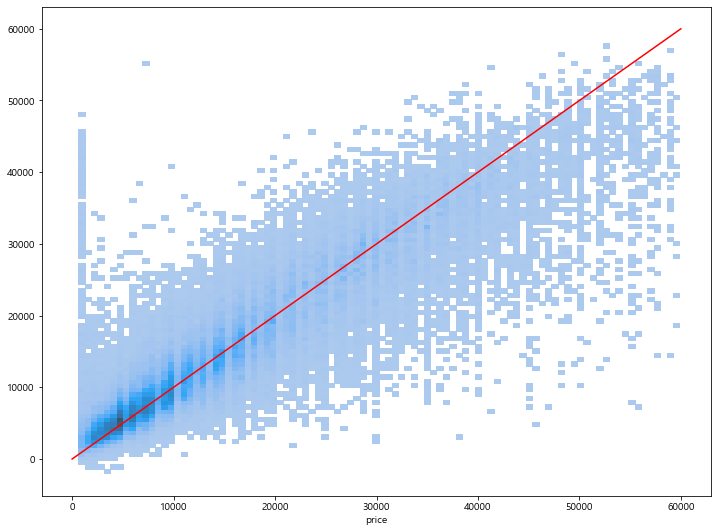

In [206]:
sns.histplot(x=y_test, y=pred)
plt.plot([0, 60000], [0, 60000], 'r-')

- 값이 저렴한 차들에 대한 가격 예측은 어느정도 효과적으로 이뤄지고 있다.
- 다만 초반에 낮은 가격대의 데이터를 보면 실제값은 매우 낮은데 차량값이 매우 비싸게 측정된 데이터들이 다수 보인다.
- 반대로 차량값이 비싸졌을때는 예측값이 너무 과소평가되는 경향이 있다.

### 에러 값의 히스토그램 시각화


#### 에러율 시각화

- 에러율이 낮고 모델 정확성이 높을 수록 0을 기준으로 집약된 그래프가 나온다.
- 반대로 에러율이 높을 수록 특정 방향 혹은 양방향으로 퍼져나가는 아래와 같은 그래프들이 나온다.
    - histplot이
    - 좌측으로 치우친다면 underestimate (과소평가) 하는 경향이 강한 것
    - 우측으로 치우친다면 overestimate (과대평가) 하는 경향이 강한 것

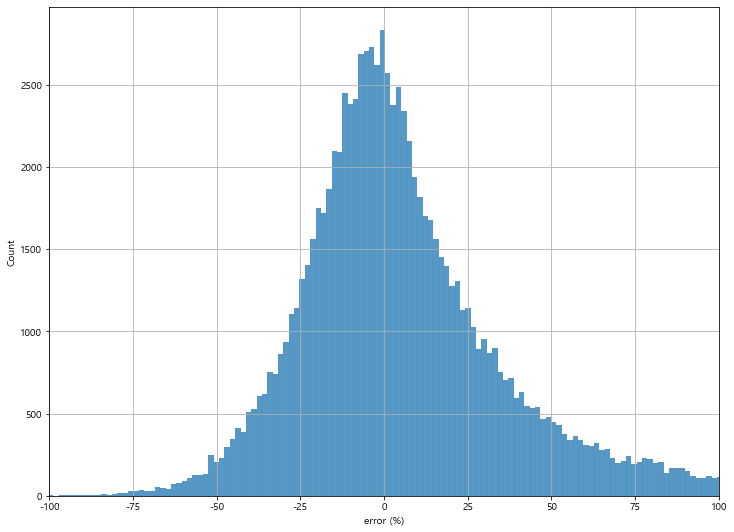

In [207]:
# err의 히스토그램으로 에러율 히스토그램 확인하기
err = (pred - y_test) / y_test * 100
sns.histplot(err)
plt.xlabel('error (%)')

# 대칭적으로 크게 보기위해 범위 제한
plt.xlim(-100, 100)
plt.grid()

- 에러가 0을 기준으로 살짝 좌측으로 치우쳐져 있다. = 예측을 전반적으로 과소평가 하는 경향이 있다.
    - pred값이 y_label보다 작게 나오니까.
    - 다행히도 에러율이 -100%를 넘지는 않고 있다. (-100%가 넘으면 예측값이 음수라는 의미)
    - 즉, 모델이 정상적으로 작용은 하고 있다는 의미
- 반면에 양수값의 경우 에러율이 매우 높은 결과의 빈도수가 높은 경향이 보인다.
    - histplot에서 확인한 저가 일때 지나치게 과도한 고가로 예측했던 데이터틀일 가능성이 높다.

#### 에러값($) 시각화

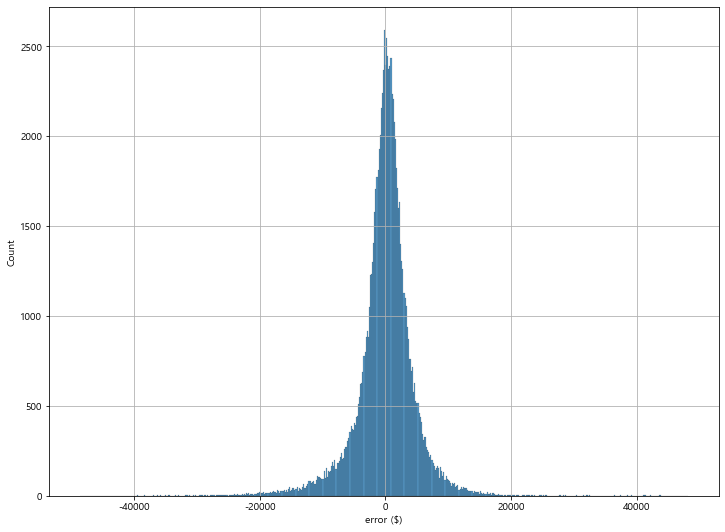

In [208]:
err = (pred - y_test)
sns.histplot(err)
plt.xlabel('error ($)')
plt.grid()

- 에러의 값을 실제로 보면 데이터가 좌측으로 치우쳐 있다. 
- 실제 y_label인 price를 비교한 것이기 때문에 절대값으로 비교하게 된다.
- 상대적으로 위쪽에서 본 에러율 같은 경우 결과에 대한 패널티가 더 많이 부여되어 표현된다.
    - e.g: 값은 작은데 에러가난 예측값은 매우 크면 그 값은 더 크게 표현되는 식

- 에러율 vs 에러값 은 어떤 것이 정답인 것은 아니다.
- 분석의 목적, 혹은 결과 해석의 목적 등에 따라 위와 같이 다양하게 결과를 시각화 하고 표현하여, insight를 얻을 수 있다.